# Introduction

Under the Toxic Substances Control Act, as amended by the Frank R. Lautenberg Chemical Safety for the 21st Century Act, EPA evaluates potential risks from new and existing chemicals and acts to address any unreasonable risks chemicals may have on the human health and the environment. The non-confidential TSCA Inventory contains 86,741 chemicals, of which 42,293 are active (at the time of writing February 2024) in commerce which renders the use of traditional approaches too resource and time intensive to generate relevant data to facilitate assessment. In 2022, EPA launched a new effort under TSCA to modernise the process and bring innovative science to the review of new chemicals before they are permitted to enter the marketplace. This included a multi-year collaborative research programme (known as the New Chemical Collaborative Research Program (NCCRP)) to refine existing approaches as well as develop and implement new approach methods (NAMs) to ensure the best available science could be applied in new chemical evaluations. Several key areas were proposed to: 1) refine read-across approaches; 2) digitise and consolidate existing information on chemicals and combine them with publicly available sources to broaden coverage and accessibility; 3) update Quantitative Structure Activity Relationship (QSAR) models for physical and (eco)toxicological properties; 4) explore ways of integrating and applying New Approach Methods (NAMs) in new chemical assessments thereby reducing the reliance on animal testing and 5) develop decision support tools to integrate various data streams to facilitate new chemical risk assessment [@usepa_2022]. 
In terms of actualising how *in vitro* NAMs would be integrated and applied, a selection of different technologies were identified for evaluation as part of a proof of concept study. These comprise a battery of Tier 1 broad profiling and targeted Tier 2 NAMs as described in the US EPA's 2019 Computational Toxicology BluePrint [@thomas_next_2019]. Broad profiling NAMs encompass high-throughput phenotypic profiling (HTPP) [@nyffeler_bioactivity_2020] technologies which measure a large number of cellular morphological features that can be used to inform point of departure, molecular initiating events and bioactivity. Targeted Tier 2 NAMs include high-throughput transcriptomic (HTTr) [@harrill_considerations_2019] and high-throughput screening (HTS) assays (e.g. such as ToxCast [@judson_2010; @richard_toxcast_2016]).  Collectively, these technologies have the potential to fill gaps related to molecular initiating events such as nuclear receptor targets, genotoxicity, oxidative stress. They can also be tailored to different routes of exposure or address specific toxicities that are more closely aligned with traditional adverse outcomes such as developmental toxicity. In addition to technologies to characterise biological activity, High Throughput Toxicokinetic (HTTK) approaches [@wetmore2015] to assess dosimetry and kinetics form an important component of informing point of departure estimations. <br> 
Herein a cheminformatic workflow was developed to identify a set of 200-300 representative candidate case study chemicals from the TSCA non-confidential active inventory, including some reference chemicals [@judson_workflow_2019] in an effort to increase scientific confidence in the application of NAMs for informing chemical safety. These data will be used to evaluate performance of the selected NAMs for further application and may also inform evolving frameworks for using multiple data streams to perform bioactivity-based dose-response assessment and hazard identification.The aims of this study are therefore:

* Construct a structure-based version of the TSCA active non-confidential inventory (herein referred to as the 'TSCA landscape')
* Profile the TSCA landscape on the basis of the [EPA New Chemical Categories](https://www.epa.gov/reviewing-new-chemicals-under-toxic-substances-control-act-tsca/new-chemicals-program-under-tsca) and the ClassyFire ontology [@djoumbou2016] to assign substances into broad structural categories
* Develop a categorisation scheme to assign substances into structural categories that maximise 'within structural similarity' whilst maintaining a total number of terminal categories that would facilitate candidate substance selection within a certain scope of resources
* Identify representative substances from the TSCA landscape for NAM screening taking into account structural considerations and technical constraints
* Evaluate the TSCA landscape in terms of selected predicted physicochemical and toxicity considerations to help characterise prioritise structural categories based on their anticipated hazards of concern 

# Materials and Methods

## Dataset

The list of ~32,000 Non-confidential TSCA Active inventory substances that had been registered on the EPA CompTox Chemicals Dashboard (August 2022) [@williams2017] was downloaded for subsequent processing and analysis. This was filtered to only retain substances for which a discrete structure was available, mixtures and substances of unknown or variable composition, complex reaction products or of biological materials (UVCBs) were excluded from consideration. There were 14,247 substances with structural information. The dataset was processed using the Python package RDKit [@landrum_rdkit] to convert the simplified molecular-input line-entry system (SMILES) into molecular objects so that a structure-data-file (SDF) could be generated for input into the OPEn structure-activity Relationship App (OPERA) expert system [@mansouri2018] for physicochemical property prediction and QSAR-Ready SMILES [@mansouri_automated_2016] derivation. The latter are desalted, stereochemistry stripped versions of SMILES that are more amenable to QSAR predictions.  Of the 14,247 substances processed, 51 substances could not be rendered into molecular objects by RDKit.

## Categorisation Workflow

Using the dataset constructed, a categorisation workflow was then developed to inform the selection of approximately 200-300 substances that would be nominally representative of the TSCA Active inventory from a structural perspective but would also satisfy two practical constraints namely the substances could be readily procured from EPA's chemical supplier, Evotec and be testable in the Tier 1 and 2 NAM screening systems. The approach would rely on firstly assigning substances into predefined categories known as primary categories which were subsequently subset into smaller categories (secondary categories). Secondary categories  were expected to be more structurally similar on the basis of their chemical structural representation than the initial primary categories. Secondary categories could be then further subcategorised using hierarchical clustering approaches to tertiary categories to increase their within structural similarity further. Techniques to identify representative substances taking into account structural similarity as well as other practical/technical constraints were considered. @fig-categorisation shows the conceptual workflow developed that shaped the case study. 

![Categorisation workflow](Figure1.png){#fig-categorisation}

## Profiling Substances into Categories

A pragmatic number of final categories was needed to capture the breadth and diversity of the TSCA landscape, yet facilitate selection of ~200-300 representative substances. To that end, primary categories were first explored making use of 2 approaches - profiling the TSCA landscape on the basis of the  EPA New Chemical categories (NCC) and the ClassyFire ontology [@djoumbou2016] .

### Primary Categories

*EPA New Chemical Categories (NCC)*

Under section 5 of the Toxic Substances Control Act (TSCA), EPA's New Chemicals programme helps manage potential risk to human health and the environment from chemicals new to the marketplace. For the purposes of regulation under TSCA, a chemical that is on the TSCA Inventory is considered "existing" as in a substance known to be in US commerce. Any substance that is not on the Inventory is considered "new". For a new chemical that will be imported or manufactured in the US, the manufacturer/importer is required to file a notice to EPA, known as a premanufacture notice (PMN). EPA then undertakes an assessment of that chemical to determine whether it poses a risk based on its hazard and exposure profile. One of the resources EPA makes use of during that assessment are the so-named New Chemical Categories (NCC). These are a set of categories whereby substances with shared chemical and toxicological properties have been grouped into categories. Many of the categories are defined based on their structural characteristics such as functional groups and physicochemical parameters. In certain cases, the categories may provide indications of what ecotoxicological or toxicological hazards might be associated with that category thereby providing recommendations of the types of data that would be informative for an assessment. At present, there are 56 categories that have been developed. These were last updated in August 2010 (https://www.epa.gov/reviewing-new-chemicals-under-toxic-substances-control-act-tsca/chemical-categories-used-review-new) and are described in narrative form in a pdf document available for download. As part of this case study, the 56 categories were first re-implemented into a machine readable format making use of structure query syntax (as Simplified molecular-input-entry-system (SMILES) arbitrary target specification (SMARTS)) to facilitate profiling of substances into one or more of the categories. The xml file of the NCC encoded in the [OECD Toolbox v4.5](qsartoolbox.org) [@schultz_2018] was exported and formed the foundation of creating an independent ruleset for the NCC which was augmented for certain categories and coupled with predictions of physicochemical parameters to provide a means of profiling the TSCA Landscape into their respective NCC. 

*ClassyFire*

All substances were also assigned into classes using the structure-based chemical taxonomy developed by the Wishart laboratory [@djoumbou2016]. ClassyFire assigns chemicals into a taxonomy consisting of >4800 different categories. The taxonomy comprises 11 different levels such as Kingdom, SuperClass, Class, SubClass etc. The webserver accessible at http://classyfire.wishartlab.com/ was used to query each substance by its hashed International Chemical Identifier (InChIKey) [@heller_inchi_2015] and assign it into Kingdom-SubClass levels. For the 14,247 substances - 13,477 were assigned into Kingdom 'Organic compounds', 593 into Kingdom 'Inorganic' and the remaining 179 returned no information. These 179 were assigned into an arbitary class of "Other" to facilitate ongoing processing. 

### OPERA generated physicochemical parameters {sec-opera}

The OPERA expert system  [@mansouri2018] version 2.8 was used to generate a range of physicochemical properties predictions for all substances in the dataset. LogP (octanol water partition coefficient), melting point, boiling point and vapour pressure predictions were generated since these would provide a means of determining physical form at room temperature and volatility (both considerations for technical testing potential). Substances were standardised into QSAR READY format so that stereochemistry, salt forms etc were removed from the substances under consideration. Accordingly some substances could not be converted into QSAR READY format. Merging OPERA predictions with the starting dataset found that 946 substances were not associated with any OPERA prediction either because substances were mixtures (6), were too large in size to be processed (12), could not be converted into a molecular objective by RDKit (51) or were inorganic (588) or organometallic (289) in nature. Predictions were possible for up to 13,299 substances from the starting dataset. 

### Secondary and Terminal categorisation

Since structural diversity was likely to be high within a primary category – an approach was needed to balance maximising 'within category' structural similarity relative to the total number of terminal categories. Hierarchical clustering (using Ward's criterion [@ward1963])  on the basis of Morgan chemical fingerprints [@rogers_2010] (using radius 3 and bitvector length 1024) was applied to those primary categories where membership exceeded 65 substances. The first generation of clusters was taken as the secondary category. Sixty-five was an arbitrary but pragmatic threshold based on the distribution of membership size. Thirty-nine primary categories had a membership size less than 65. Primary categories whose membership was less than 65 were termed terminal categories. Primary categories containing more than 65 membership underwent further subcategorisation into secondary categories by applying hierarchical clustering. These secondary categories were hence termed terminal categories. 

### Representative Substance Identification

The nominally representative substance for a given terminal category was taken as the medoid. This was defined as the substance with the minimum pairwise distance from all other members of that category. This was used as an initial seed to then identify and additional set (up to 5) of structurally diverse substances within the category on the basis of their Morgan chemical fingerprints. The approach used in this case was the MaxMin procedure [@ashton_2002] within RDKit. As described in the RDKit documentation, the algorithm works as follows:
1. Generate chemical features (e.g. Morgan chemical fingerprints) for all the substances, both any initial seeds (in this case, the medoid computed) plus those to pick from (the candidate pool). 
2. From the molecules in the candidate pool, find the one that has the maximum value for its minimum distance to substances in the picked set (hence the MaxMin name), calculating and recording the distances as required. This substance is the most distant one to those already picked so is transferred to the picked set.
3. Iterate back to step 2 until the number of substances required is met.
The MaxMin procedure was performed for all terminal categories containing at least 5 or more members.

### Creation of a Constrained Landscape 

The landscape was constrained to only consider substances that were potentially screenable in the NAM suite. Screenability was based on 3 main considerations: 1) (physico)chemical characteristics, 2) procurability and 3) out of scope due to existing NAM data. The physicochemical characteristics captured physical state at room temperature and pressure. These were inferred based on the OPERA predictions generated (see @sec-opera). Melting and boiling point thresholds as outlined in the US EPA Sustainable Futures Programme [https://www.epa.gov/sites/default/files/2015-05/documents/05-iad_discretes_june2013.pdf] was used to determine whether a substance was likely to be a solid, liquid or gas at room temperature and pressure. Volatility was modelled using vapour pressure (VP). If a substance had a logVP less than 2 mmHg, then it was considered screenable. The Lipinski rule of 5 [@lipinski_2001] uses simple heuristics to denote oral absorption namely LogP <5, MW <500 and Hydrogen bond donor or acceptors (< 10 or <5). If any of these criteria are met, this is referred to as a Lipinski failure. For the purposes of this study, if the number of Lipinski failures was less than 3, than a substance was considered screenable. Certain elements could also factor problematic for chemical procurement and/or testing. Only substances containing the following elements, C, H, N, O, P, S, Halogens and Si when not adjacent to an O were tagged for consideration. Procurability was estimated based on the number of vendors listed in  [PubChem] (https://pubchem.ncbi.nlm.nih.gov/)  for a given substance. The vendor count needed to be at greater than 1. Out of scope referred to the substance having already been tested in the ToxCast screening programme. Considering all these aspects, the inventory was filtered to only retain substances that were tagged as screenable. For this set of substances,  medoids and MaxMin substances were also identified using the same approach as already described. 

### Other considerations

Aside from selection of representative substances from the full and constrained inventory on the basis of the outlined considerations, several other aspects were also used to inform the final selection process. Analytical method detection amenability predictions for liquid-chromatography mass spectrometry (LM-MS) were generated using the QSAR model developed by Lowe et al. [-@lowe_2021] to provide an indication of which chemicals lent themselves to aqueous-based screening. Structural considerations based on lists of substances on the Dashboard known to be potentially explosive or highly reactivity were also tagged. Category membership size was aanother consideration - size bins were set at less than 20 members, between 20-70, between 70-150, between 150-300 and finally between 300-600. A final manual check was performed to review all proposed candidate substances for testing following application of these criteria.

## Evaluation of Selected Candidate Substances

### Physicochemical Comparison

t-distributed schocastic neighbourhood mapping [@maaten_2008] was performed using Morgan fingerprints computed for all the chemicals in the TSCA landscape. This was plotted as a scatterplot and colour coded by 1) screenable considerations and 2) the selection of candidate substances. The intention was to visually compare how representative the screenable and/or candidate selections were from a structural perspective relative to the TSCA landscape. In addition, 2D boxplots were created to compare the distribution of selected predicted physicochemical parameters of the TSCA landscape chemicals relative to that of the selected candidates. 

### Predicted Structural Alert Profile

The entire set of TSCA landscape chemicals were profiled through the Derek Nexus 2.5 system to generate structural alerts using default settings. This would captures the following endpoints including: carcinogenicity, fenotoxicity, irritation, neurotoxicity, organ toxicity, reproductive toxicity, respiratory sensitisation, skin sensitisation and miscellaneous endpoints (such as chloracne, methaemogloneaemia, blood in urine). The output was processed and aggregated so that a structural alert fingerprint representation was constructed indicating presence or absence of that alert for a given substance. The fingerprint representations were explored through the lens of the terminal categories  1) to visually evaluate the consistency in the alert profiles across a  category and 2) to identify whether certain endpoints were overrepresentated in one category versus another. 

### Predicted Toxicity Profile

Predictions of the entire landscape were made using the Toxicity Estimation Tool (TEST) version 5.1.2  [https://www.epa.gov/chemical-research/toxicity-estimation-software-tool-test] for the developmental toxicity and Ames mutagenicity endpoints. Projections onto 2D using t-SNE were used to explore the extent to which TEST predictions were consistent throughout a terminal category. Predictions were also generated using OPERA - CATMOS for rat oral acute toxicity [@mansouri_catmos_2021,]. Comparisons of the distributions of the potencies across the TSCA landscape relative to the candidate substances were made. An evaluation to identify which terminal categories were associated with most and least potent LD50 values was also undertaken. CERAPP for Estrogen Receptor (ER) binding [@mansouri_cerapp_2016] and COMPARA for androgen receptor (AR) binding [@mansouri_compara_2020] . 

### Predicted ToxCast Profile

Using a deep learning graph attention mechanism network developed in Adams et al, *in preparation*, predictions were made for the TSCA landscape to profile the likely NAM profile with respect to selected ToxCast assays. The selected assays focused on one vendor datastream, Attagene (ATG) which provides insights into transcription factor activity in transformed HepG2 cells. A multi-task graph based approach as implemented within the DeepChem python library was used to develop the prediction model.

### Availability of AOP information and predicted Target 
tbd

### Availability of *in vivo* toxicity data within terminal categories 

To be determined

### Putting it all together
To be determined

### DATA ANALYSIS SOFTWARE AND CODE

Data processing was conducted using the Anaconda distribution of Python 3.9 and associated libraries, NumPy [@harris_2020], Pandas [@team_pandas-devpandas_2023], Scikit-learn [@pedregosa_scikit-learn_2011], Matplotlib [@hunter2007] and Seaborn [@waskom_mwaskomseaborn_2022]. Jupyter Notebooks [@Kluyver2016jupyter], scripts and datasets will be made available on github at XXXX and on Figshare at XXXX.

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import openpyxl

In [4]:
TOP = os.getcwd().replace('reports/tsca', '')
raw_dir = TOP + 'data/raw/'
processed_dir = TOP +'data/processed/'
interim_dir = TOP + 'data/interim/'
external_dir = TOP + 'data/external/'

## Results and Discussion

### Primary and Secondary Structural categories 

The TSCA landscape downloaded comprised 14,247 substances.  Of this set, 51 substances could not be rendered into a molecular object by RDKit. OPERA predictions were possible for up to 13,299 substances from the starting dataset. 946 substances were not associated with any OPERA prediction either because substances were mixtures (6), were too large in size to be processed (greater than 100 carbon atoms which prevents descriptor generation within OPERA)  (12), were not converted into a molecular objective by RDKit (51), had no SMILES (2),  were inorganic (588) or organometallic (289) in nature. 

Using the OPERA physicochemical predictions, substances were assigned into their most likely physical form. Based on the thresholds defined in the EPA Sustainable Futures guidance, 1029 substances (7%) could not be assigned a physical form (in the majority of cases, this was on account of no predicted melting point or boiling point prediction available, although for 68 cases this was because the criteria did not account for substances that might have a predicted value of exactly 25 deg C). For the substances that could be assigned, 54% (7690) were solids, 28% (5407) were liquids and 0.8% (121) were gases. *Note if the thresholds were adjusted, those 68 substances would have been categorised as liquids.*  The distribution of the physical form suggested that only a very small number of substances within the TSCA landscape would merit consideration of an inhalation route of exposure.

*EPA New Chemical Categories (NCC)*

The dataset was processed through the NCC in conjunction with the physicochemical property information from OPERA to make category assignments. Over 46% of substances were not assigned to any NCC. Although some 948 could not be processed due to lack of QSAR ready SMILES, the primary reason for the non assignment was the lack of a relevant existing category.  The next largest NCC assignment was neutral organics (18.7%), followed by esters, phenols and anilines. Substances could be assigned to more than 1 NCC e.g. Esters and Substituted Triazines. There were 141 unique combinations of NCC of which 99 comprised 2 or more NCC and the remaining 43 were single NCC.  The first 50 NCC with their respective count are shown in @fig-ncc. The large number of substances that could not be assigned into a category represents a gap in coverage of the NCC for the TSCA landscape and presents an opportunity for new categories to be derived. This is the subject of an ongoing but related study.

In [3]:
df = pd.read_excel(interim_dir+'TSCA_all_110822.xlsx', sheet_name = 'TSCA_ALL', index_col = [0])

In [4]:
#df[df.NCC.isnull()].info()

In [5]:
import re

In [6]:
df1 = (df.NCC.value_counts(dropna = False, normalize = False)
 .reset_index())

In [7]:
df1['index'] = (df1['index'].replace(np.nan, 'None')
 .apply(lambda x : re.sub(r'\(Acute toxicity\)|\(Chronic toxicity\)',  r'', x))
 .apply(lambda x : re.sub(r'\(|\)',  r'', x))
)

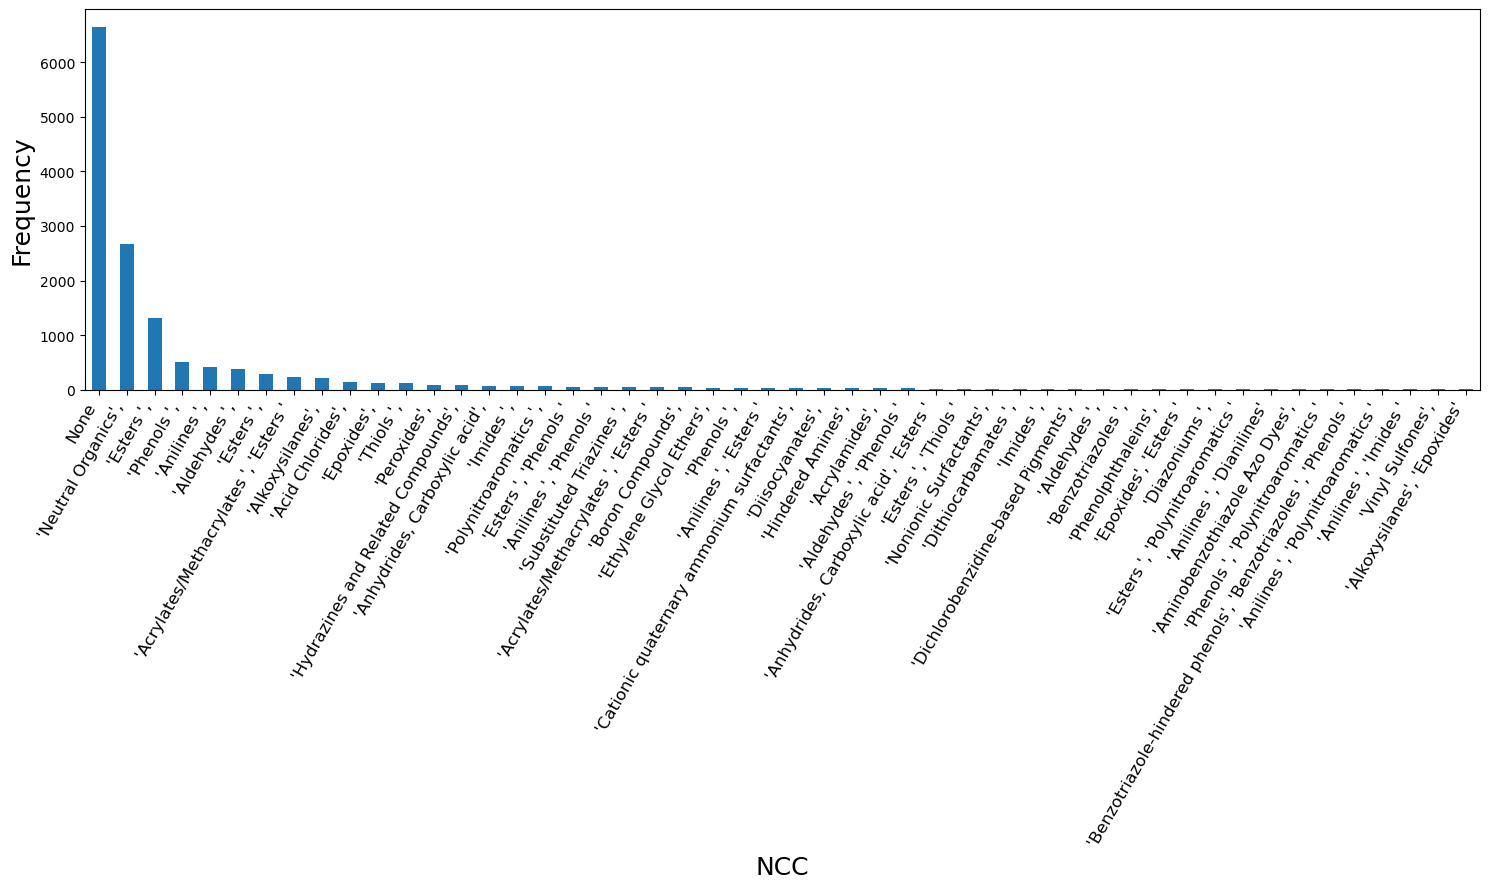

In [8]:
#| label: fig-ncc
#| fig-cap: 'Frequency of NCC membership, first 50 categories shown'

f, ax = plt.subplots(figsize = (15,9))
df1.head(50).NCC.plot.bar()
ax.set_xticklabels(df1['index'][:50],  rotation = 60,ha="right", fontsize = 12)
ax.set_ylabel('Frequency', fontsize =18)
ax.set_xlabel('NCC', fontsize =18)
plt.tight_layout();

In [9]:
chk = [e.strip(")").strip('(').strip('"').split(',') for e in df.NCC.unique().tolist() if pd.notnull(e)] 

In [10]:
#len([(e[0],e[1]) for e in chk if e[1] == ''])

*ClassyFire primary categories*

Since almost 47% of substances could not be assigned to a NCC, the ClassyFire ontology was used to assign substances into primary categories based on its chemical taxonomy. Substances that returned no taxonomy information was assigned to an arbitrary "Other" class. The majority of substances (13477) were assigned to the Organic compounds Kingdom. At the next level of granularity, Superclass was associated with 27 categories whereas the level down Class was associated with 270 unique categories. Given the objective of identifying 200-300 candidates for testing, using "Class' as a basis for the primary category (per @fig-categorisation) would rapidly exceed the number of practical categories from which to draw from. Exploring the frequency of the Superclass designation found that whilst there were 27 unique categories, 5 had memberships exceeding 1000. A hybrid approach of using Superclass as the primary category designation was taken for Superclasses that contained fewer than 1000 members whereas the 5 Superclasses within memberships exceeding 1000 (Benzenoids, Lipids and Lipid-like, Organoheterocyclic compounds, Organic acids and derivatives, Organic oxygen compounds) were expanded into their respective Class assignment. This resulted in 68 unique ClassyFire categories that formed the basis of the primary categories. The frequency of the TSCA landscape across these ClassyFire primary categories is shown in  @fig-classyfire

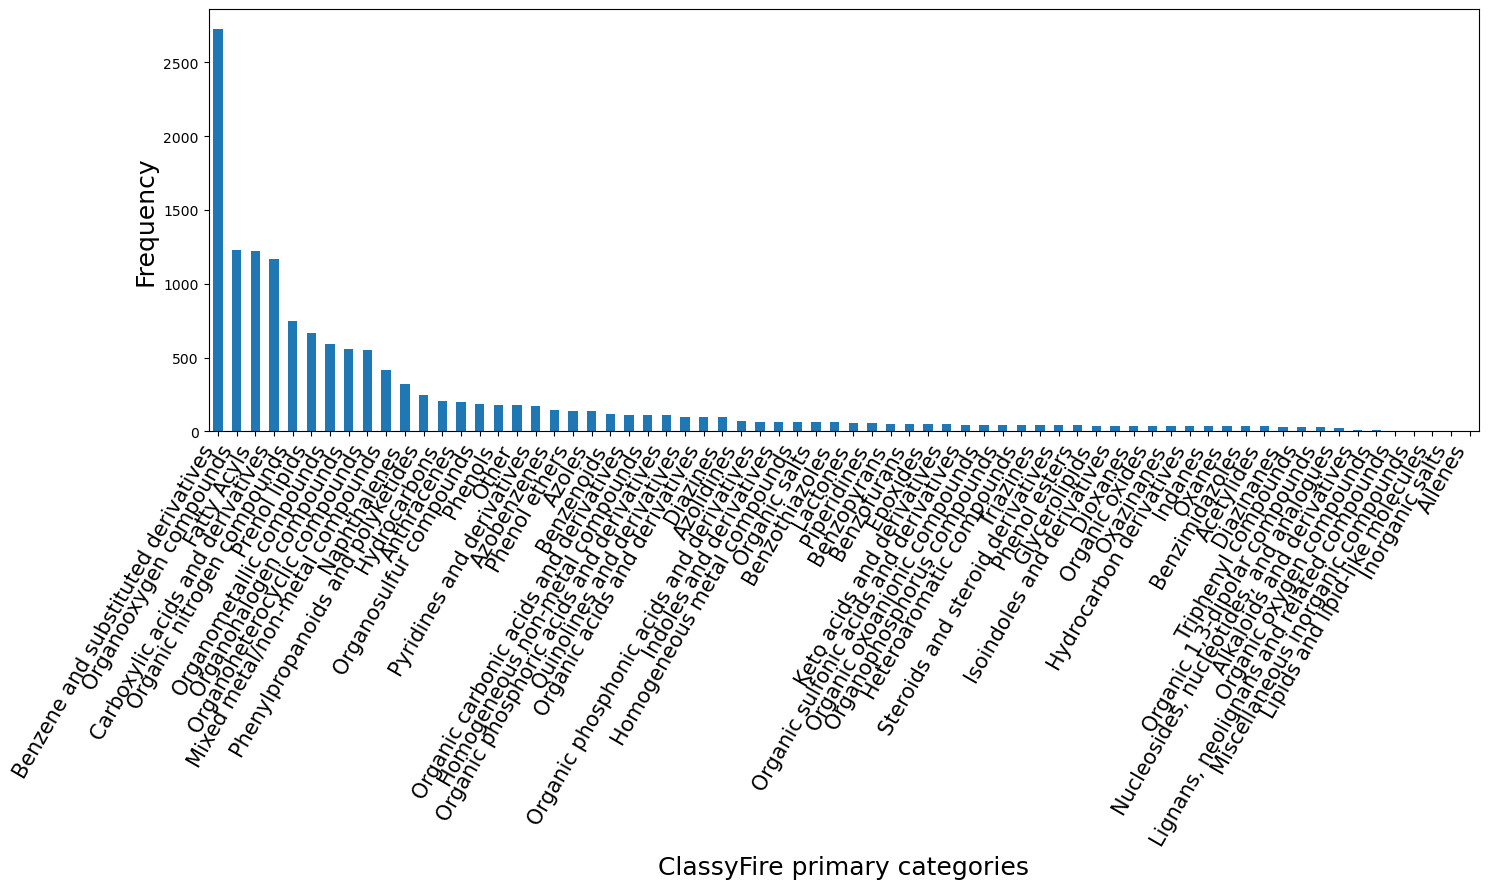

In [11]:
#| label: fig-classyfire
#| fig-cap: Frequency of ClassyFire primary categories for the TSCA landscape

f1, ax1 = plt.subplots(figsize = (15,9))
df.ClassyFire.value_counts().plot.bar()
ax1.set_xticklabels(ax1.get_xticklabels() , rotation = 60, ha="right", fontsize = 15)
ax1.set_ylabel('Frequency', fontsize =18)
ax1.set_xlabel('ClassyFire primary categories', fontsize =18)
plt.tight_layout();

In [12]:
#df[(df.NCC.isnull())]['Class'].value_counts().head(15)

Inspection of the substances without NCC assignment found that these were most associated with ClassyFire Classes including Benzene, Organonitrogen compounds, Fatty Acyls, Carboxylic acids, Organooxygen, organometalloid and naphthalenes. 

### Secondary-terminal categorisation 

Medoids were first calculated for each of the 68 primary categories. The pairwise Jaccard distance between the medoid and the remaining members of the category were also computed. This was generated as a potential consideration for candidate chemical selection later - conceivably the medoid might not be feasible to test due to procurability issues but a close match on the basis of Jaccard distance might be a practical alternative. For primary categories containing less than 65 members, no further refinements were made - the primary category was effectively named as the terminal category. For primary categories with greater than 65 members of which there were 29 such categories, a hierarchical clustering was performed using Morgan fingerprints as inputs. The first generation of clusters were extracted for each primary category based on visual inspection of the dendrogram. These were arbitrarily tagged by 1,2,3 such that the secondary category was named using the primary category root + the cluster designation. For the 29 primary categories that contained more than 65 members, using the clustering approach resulted in an expansion to 141 secondary categories. Together with the 39 primary categories that contained less than 65 members, a total of 180 terminal categories were generated. @fig-terminal shows the 37 terminal categories that have a membership exceeding 100 substances.

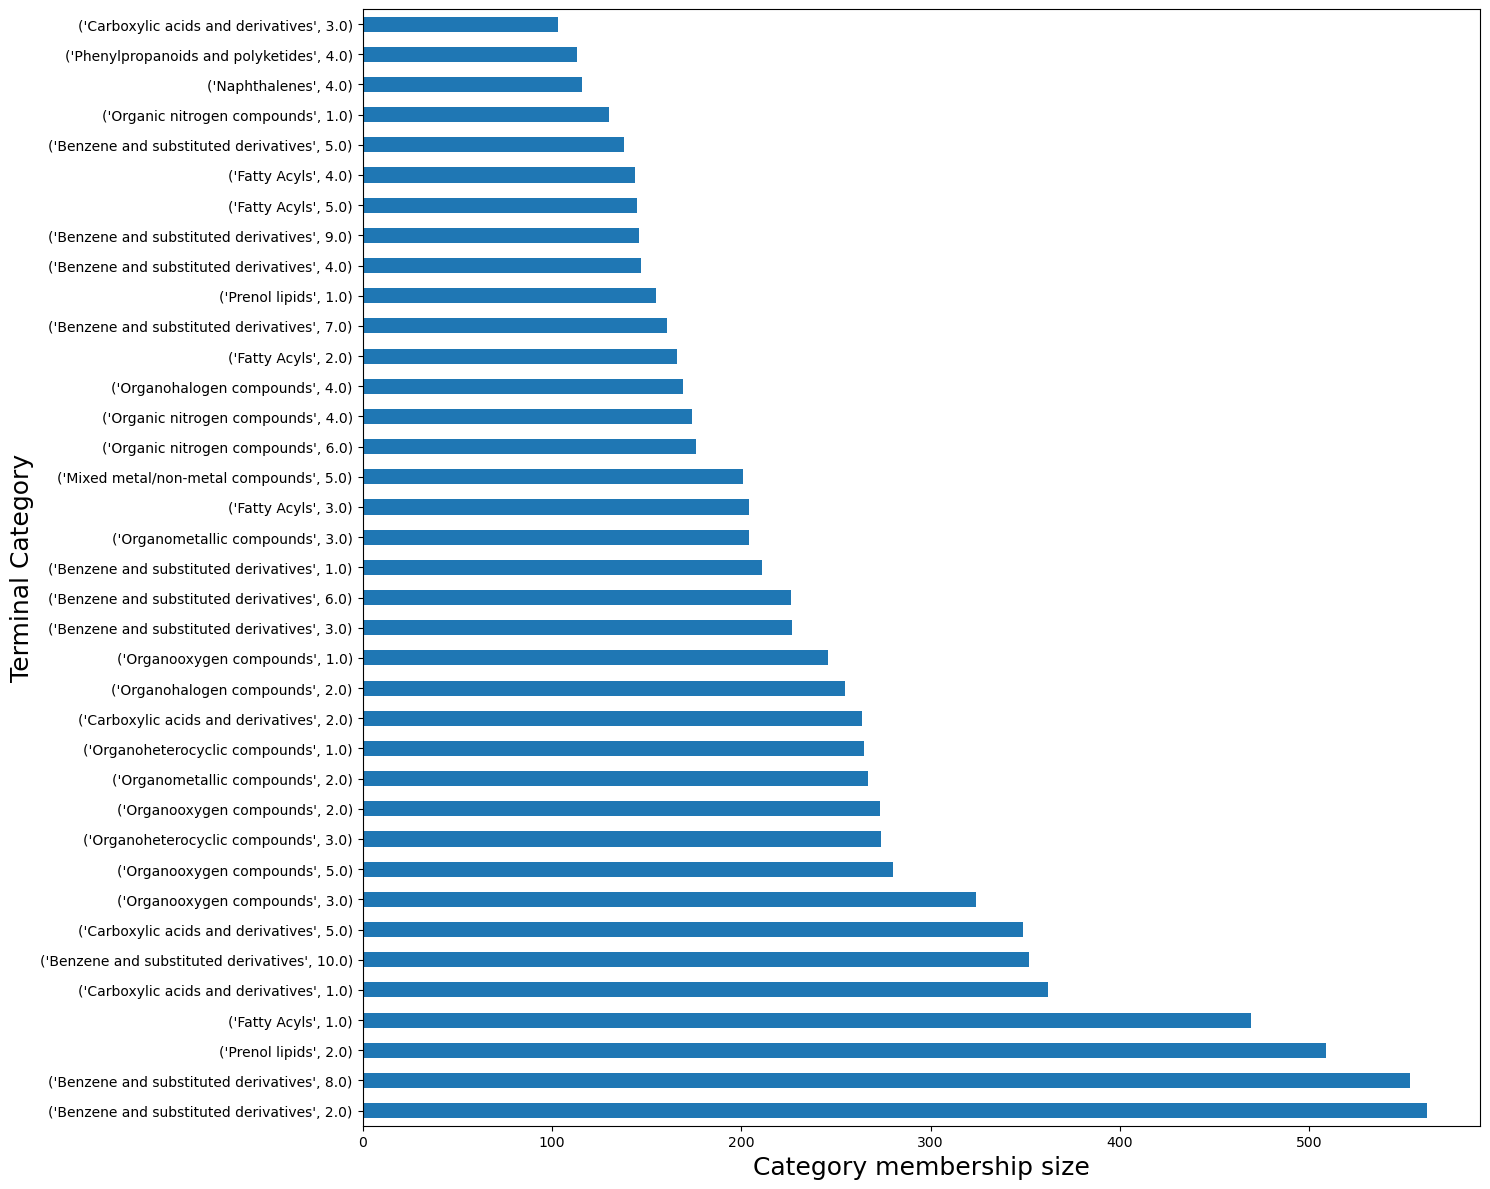

In [13]:
#| label: fig-terminal
#| fig-cap: Terminal categories exceeding 100 members

df2 = pd.read_excel(interim_dir+'tsca_medoids_070823.xlsx')
value_counts = df2['group_str'].value_counts()
value_counts_aggregated = value_counts.copy()
value_counts_aggregated['misc'] = value_counts_aggregated[value_counts_aggregated < 40].sum()
plt.figure(figsize = (15,12))
value_counts_aggregated[(value_counts_aggregated >100) & (value_counts_aggregated < 750) ].plot(kind = 'barh')
plt.ylabel('Terminal Category', fontsize = 18)
plt.xlabel('Category membership size', fontsize = 18)
plt.tight_layout()

### Diverse substance selection: TSCA landscape 

Whilst medoids were selected as the most representative substance from each terminal category, a single chemical was unlikely to capture the breadth of diversity within a category. Additional substances to capture the breadth and structural diversity relied on the MaxMinPicker method [@ashton_2002] within RDKit. This method was used to select up to 5 further substances in addition to the centroid. For the terminal categories with fewer than 65 members, the MaxMin approach was feasible for 35 of the 39 relevant terminal cateories. No MaxMin approach was performed for terminal categories: Homogeneous metal compounds, Keto acids and derivatives, Organic salts and Organophosphorus compounds. A total of 189 diverse substances were selected from the 35 terminal categories. For the 141 terminal categories which originated from the primary categories with more than 65 members, the MaxMin was applicable to 139 categories. A total of 278 substances were identified following the MaxMin approach.

### Diverse substance selection: constrained landscape

The TSCA landscape was filtered to only consider substances that could be potentially procured based on an inference that substances with greater than 1 vendor indexed in Pubchem were more likely to be procurable; was of the appropriate physical form (based on melting point and boiling point considerations); met the element conditions already outlined; was not likely to be volatile; had less than 3 Lipinski failures; and had not been tested in the ToxCast assays previously. Based on these considerations, 7565 substances were tagged as potentially amenable to screening for NAM assays spanning 160 (89%) of the 180 terminal categories. 

The MaxMin approach could be applied to 146 of the 160 terminal categories. A total of 438 diverse substances were selected as a result of the MaxMin approach. The terminal categories where a MaxMin approach was not performed are listed in @tbl-nomaxmin.

Terminal Category | Category Size|
|:---:|:----:|
| (Alkaloids and derivatives, nan) |3|
 |(Azobenzenes, 1.0) |4|
 | (Azoles, 3.0)|4|
 |(Azolidines' 1.0)|3|
 |(Azolidines, 5.0)|4|
 |(Benzenoids, 4.0)|5|
 |(Homogeneous non-metal compounds, 3.0)|1|
 | Hydrocarbon derivatives', nan) | 3|
 |(Lignans, neolignans and related compounds, nan)|4|
 |(Lipids and lipid-like molecules, nan) |1|
 |(Organic oxygen compounds, nan)|4|
 |(Organic phosphoric acids and derivatives, 3.0)|2|
 |(Other, 3.0)|4|
 |(Quinolines and derivatives, 1.0)|3|
 
: List of the 14 terminal categories where a MaxMin approach was not applied {#tbl-nomaxmin}

### Final proposed substances for testing

In terms of proposing a final set of substances for testing, substances were selected from the screenable landscape targeting terminal categories that had membership sizes greater than 20 but less than 300. @fig-catsize shows the broad category membership sizes across the terminal categories. With this final constraint, 318 candidate substances that spanned 108 terminal categories were proposed for testing. 

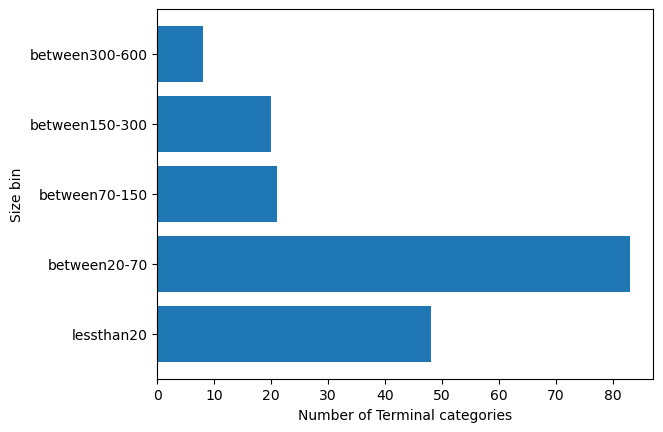

In [14]:
#| label: fig-catsize
#| fig-cap: Terminal category membership size

sizes = {
    'lessthan20': 48,
    'between20-70': 83,
 'between70-150': 21,
 'between150-300': 20,
 'between300-600': 8,
 }

fig, ax = plt.subplots()
ax.barh( [1,2,3,4,5],sizes.values())
ax.set_yticks([1,2,3,4,5])
ax.set_yticklabels(list(sizes.keys()))
ax.set_yticklabels(labels = sizes.keys())
ax.set_ylabel('Size bin')
ax.set_xlabel('Number of Terminal categories');

## Profiling of selected candidate substances 

### Structural diversity

The TSCA Landscape was projected onto 2D using a t-SNE plot and colour coded in 2 ways; 1) using a tag of screenable to permit a comparison of the structural coverage of the screenable library relative to the full landscape and 2) using a tag of the proposed candidates for testing. @fig-tsne (a) shows the screenable tag where 1 denotes substance that is member of the screenable inventory whereas @fig-tsne (b) shows the structural coverage tagged by 1 to indicate proposed candidate substance for NAM testing. Figure (a) shows how representative the constrained screenable library is of the larger landscape from a chemical structure perspective. In Figure (b) the proposed candidate (denoted as final_picks) are evenly distributed throughout the landscape suggesting that from a structure perspective, they offer promise of being broadly representative of the TSCA landscape as a whole. 

In [15]:
tsne_df= pd.read_csv(interim_dir+'tsne_df_080823.csv', index_col = [0])

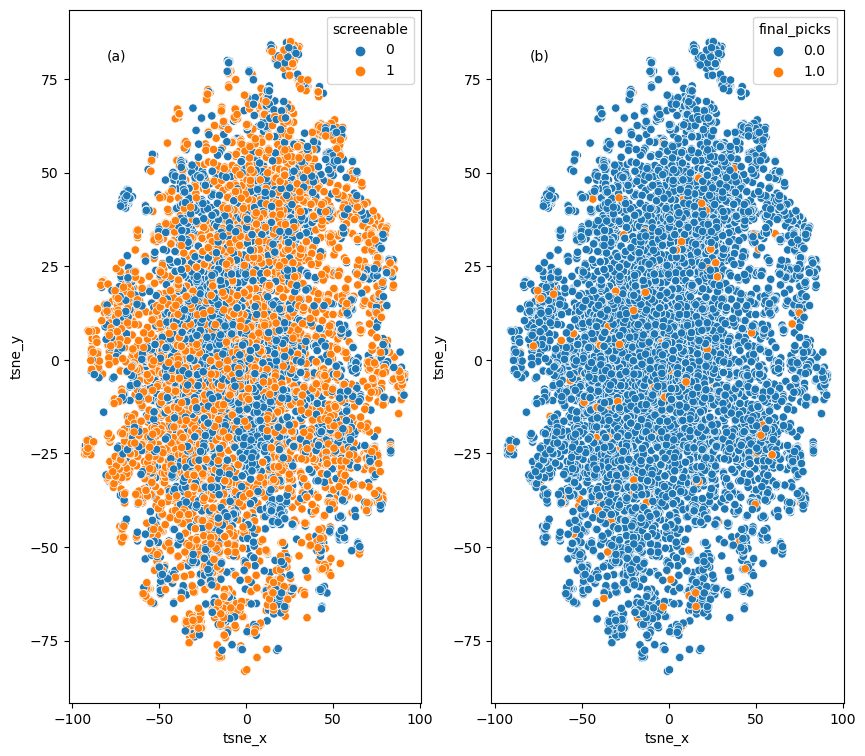

In [16]:
#| label: fig-tsne
#| fig-cap: Selected substances within the constrained Landscape or whole TSCA Landscape 

fig, ax = plt.subplots(1,2,figsize = (10,9))

sns.scatterplot(x="tsne_x", y="tsne_y",
                     data=tsne_df, hue = 'screenable', ax = ax[0])
sns.scatterplot(x="tsne_x", y="tsne_y",
                     data=tsne_df, hue = 'final_picks', ax = ax[1])
ax[0].text(-80, 80, "(a)", horizontalalignment='left', size='medium', color='black', )
ax[1].text(-80, 80, "(b)", horizontalalignment='left', size='medium', color='black', );

## Profiling on the basis of predicted physicochemical properties

From the perspective of predicted physicochemical properties, the candidate test substances also represent the range of properties for the full landscape well.  @fig-OPERA and @fig-OPERA2 both showcase the distribution of properties across the TSCA landscape and how that corresponds to the distribution of the 318 candidate substances.

In [17]:
df4 = pd.read_excel(interim_dir+'categorisatons_wscreening_constraints_final_picks_080823.xlsx', sheet_name = 'All data')

In [18]:
#df4[df4['final_picks']==1]['group_str'].nunique()

/tmp/ipykernel_1513863/2600771073.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(df4[e], color = 'b', ax = ax, label = 'all TSCA')
/tmp/ipykernel_1513863/2600771073.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(df4[df4['final_picks']==1][e], color = 'r', ax = ax, label = 'div

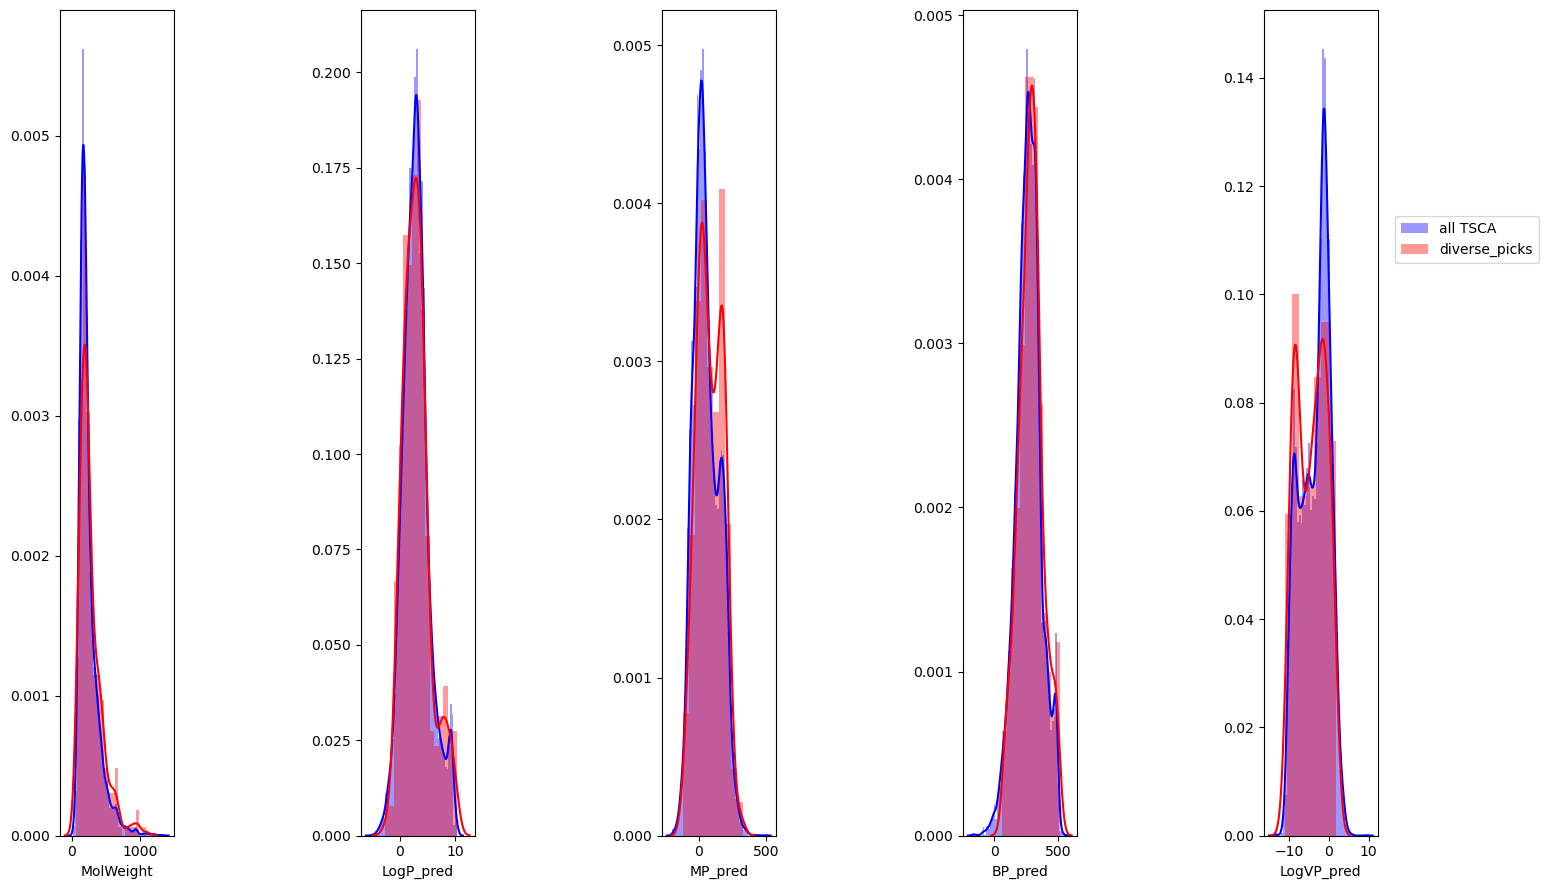

In [19]:
#| label: fig-opera
#| fig-cap: Physical property profiles between full inventory and candidate selections


f2 = plt.figure(figsize = (20,9))
k=0
for n, e in enumerate( ['MolWeight','LogP_pred','MP_pred','BP_pred','LogVP_pred']):
    ax = plt.subplot(1,7, n+1)
    g = sns.distplot(df4[e], color = 'b', ax = ax, label = 'all TSCA')
    g = sns.distplot(df4[df4['final_picks']==1][e], color = 'r', ax = ax, label = 'diverse_picks')
    ax.set_ylabel("");
    #plt.subplots_adjust(hspace = 0.8)
handles, labels = ax.get_legend_handles_labels()
#print(handles)
l = plt.legend(handles[0:5], labels[0:5], bbox_to_anchor=(1.15,0.75), loc=2, borderaxespad=0.);
plt.tight_layout();

In [20]:
df5 = pd.melt(df4, id_vars = ['dtxsid', 'final_picks'], value_vars = ['MolWeight','LogP_pred','MP_pred','BP_pred','LogVP_pred'])
#f, ax = plt.subplots()
df5['final_picks'] = df5['final_picks'].replace(np.nan, 0)

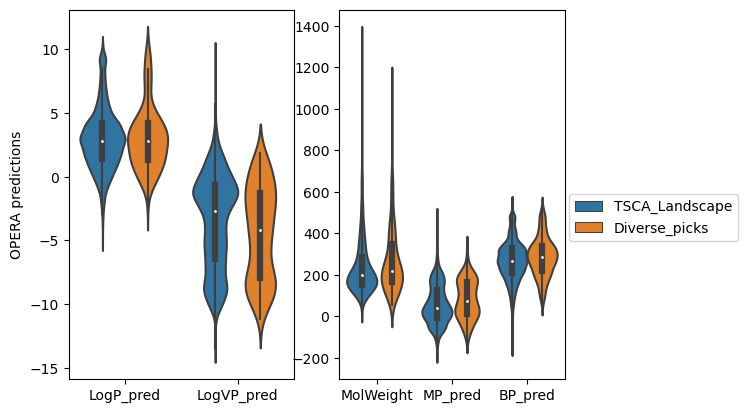

In [21]:
#| label: fig-opera2
#| fig-cap: Physical property distributions between full inventory and candidate selections


df5['final_picks'] = df5['final_picks'].replace({0:'TSCA_Landscape', 1: 'Diverse_picks'})
fig, ax = plt.subplots(1,2)
sns.violinplot(x = 'variable', y = 'value', hue = 'final_picks',data = df5[df5['variable'].isin(['LogP_pred', 'LogVP_pred'])], ax = ax[0])
sns.violinplot(x = 'variable', y = 'value', hue = 'final_picks',data = df5[~df5['variable'].isin(['LogP_pred', 'LogVP_pred'])], ax = ax[1])
ax[1].set_ylabel("")
ax[0].set_ylabel('OPERA predictions')
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].get_legend().set_visible(False)
ax[1].legend(bbox_to_anchor=(1.02, 0.5), loc='upper left', borderaxespad=0, title='');

### Predicted structural alert profile

Derek Nexus predictions were made for all TSCA landscape substances and summarised in a bit vector format so that each substance was associated with a fingerprint made up of all possible endpoint-toxicophores present. There were 619 unique end-point-toxicophore combinations encompassing 53 different endpoints. The 318 substances identified for flagged 217 of these end-point-toxicophore combinations encompassing 36 different endpoints (68% of the endpoints).

Pairwise distance matrices of the Derek fingerprints were computed to explore the extent to which there was consistency in alert profile across each terminal category. Four terminal categories are illustrated in @fig-derek to show the extent to which alert profiles varied. 

In [22]:
import pickle

dists = pickle.load(open(interim_dir+ "dists_derek_041223.pkl", "rb" ) )

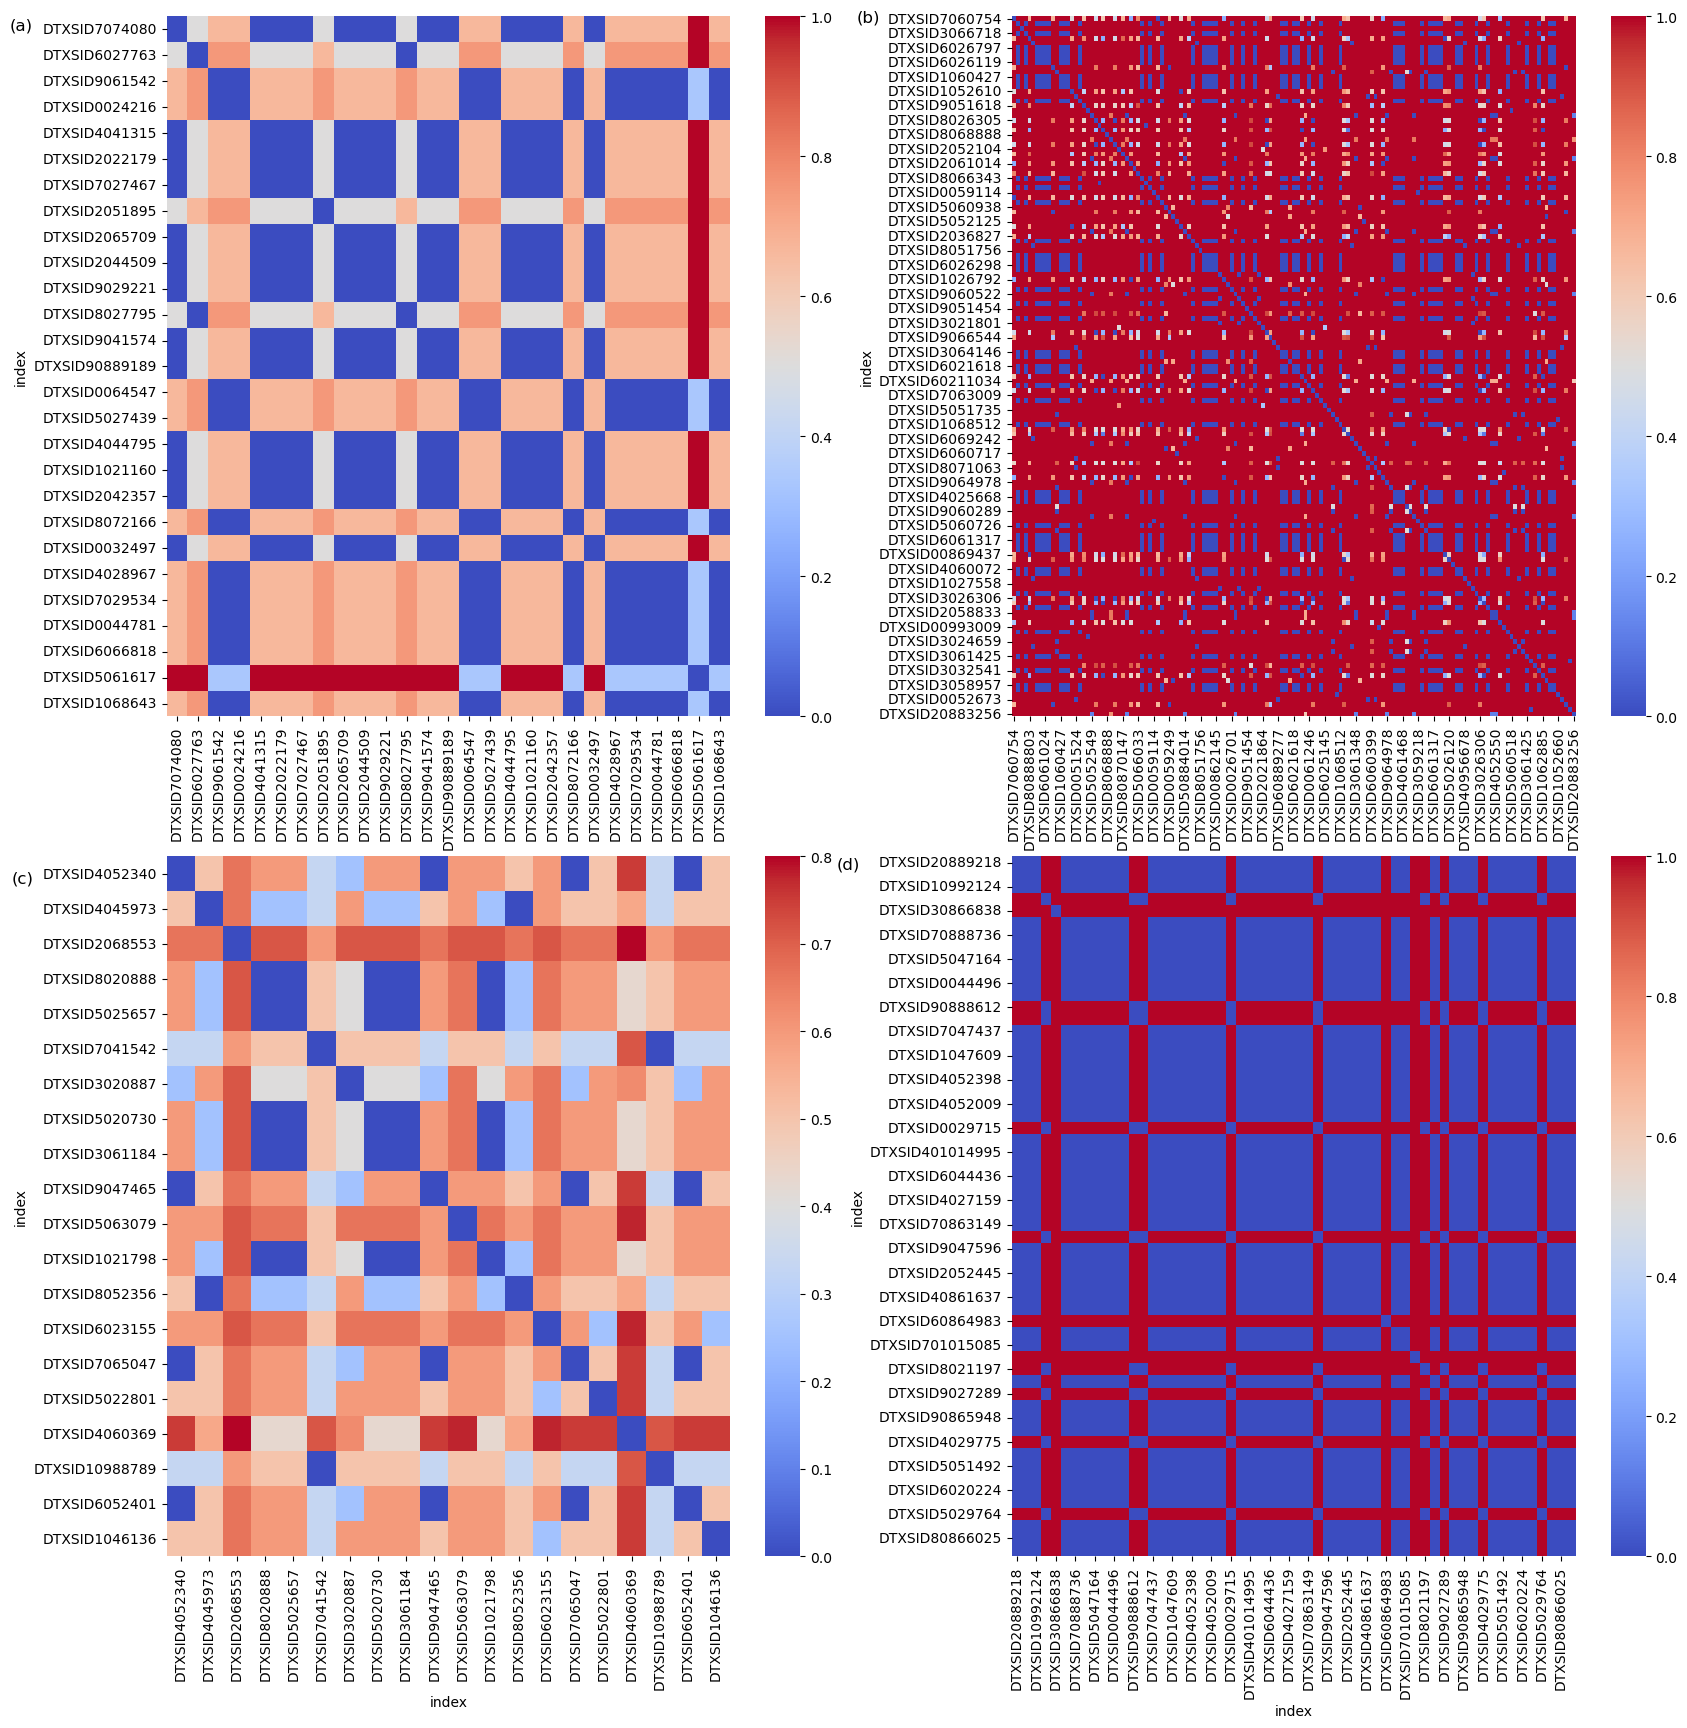

In [23]:
#| label: fig-derek
#| fig-cap: Heatmap of the pairwise distance matrices of selected terminal categories


f, ax = plt.subplots(2,2, figsize = (20,20))
sns.heatmap(dists["('Pyridines and derivatives', 1.0)"], cmap = 'coolwarm', ax = ax[0,0])
sns.heatmap(dists["('Benzene and substituted derivatives', 9.0)"], cmap = 'coolwarm', ax = ax[0,1])
sns.heatmap(dists["('Quinolines and derivatives', 3.0)"], cmap = 'coolwarm', ax = ax[1,0])
sns.heatmap(dists["('Lactones', nan)"], cmap = 'coolwarm', ax = ax[1,1])


ax[0,0].text(-7.5,0.5, "(a)", horizontalalignment='left', size='large', color='black', )
ax[0,1].text(-40,1, "(b)", horizontalalignment='left', size='large', color='black', )
ax[1,0].text(-5.5, 0.75, "(c)", horizontalalignment='left', size='large', color='black', )
ax[1,1].text(-18,1, "(d)", horizontalalignment='left', size='large', color='black', );

Figures (a - d) represent terminal categories ('Pyridines and derivatives', 1.0), ('Benzene and substituted derivatives', 9.0), ('Benzene and substituted derivatives', 9.0) and ('Lactones', nan) respectively.

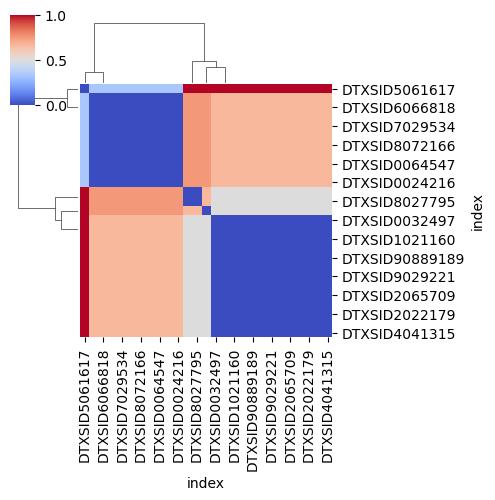

In [24]:
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
linkage = hc.linkage(sp.distance.squareform(dists["('Pyridines and derivatives', 1.0)"]), method='ward')
g = sns.clustermap(dists["('Pyridines and derivatives', 1.0)"], row_linkage=linkage, col_linkage=linkage, cmap = 'coolwarm', figsize = (5,5))

In [28]:
clusters_df = pd.read_csv(interim_dir+'pyridines_derivs.csv', index_col = [0])

For terminal category ('Pyridines and derivatives', 1.0), there are at least 3 clusters of substances which shared a common alert profile as shown in @tbl-pyridines. On the otherhand, there were at least 4 clusters within terminal category ('Quinolines and derivatives', 3.0) which shared common alert endpoint profiles as shown in @tbl-quinolines. 

|cluster number| alerts |
|:--:|:-------------------:|
|1| '('Carcinogenicity mammal', 'Di- to poly-halogenated alkane')', '('Hepatotoxicity mammal', '2-Halopyridine')','('Mutagenicity in vitro bacterium', 'Trichloromethyl aromatic compound')'|
|2| '('Hepatotoxicity mammal', '2-Halopyridine')','('Nephrotoxicity mammal', 'Aromatic nitrile')'|
|3| '('Hepatotoxicity mammal', '2-Halopyridine')','('Skin irritation/corrosion mammal', 'Pyridine or analogue')'|

: Alert profiles for terminal category ('Pyridines and derivatives', 1.0) {#tbl-pyridines}

In [29]:
linkage_c = hc.linkage(sp.distance.squareform(dists["('Quinolines and derivatives', 3.0)"]), method='ward')

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage

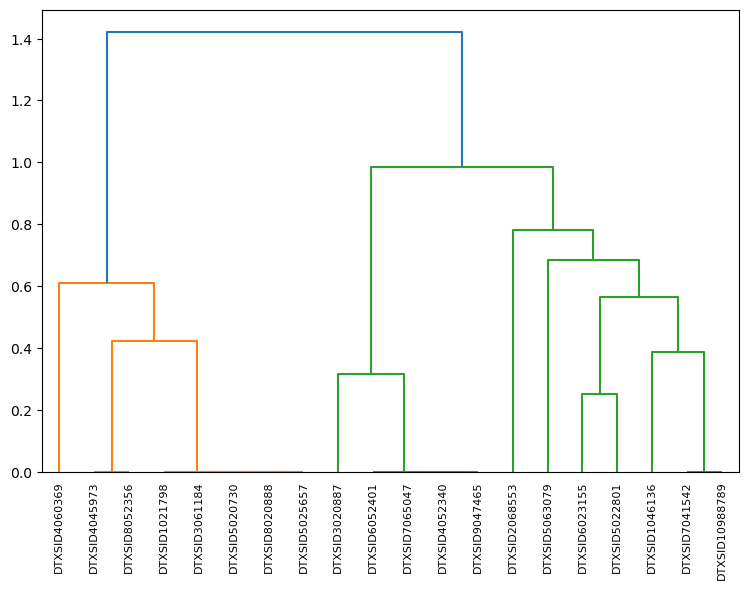

In [32]:
plt.figure(figsize=(9, 6))
dendrogram(
    linkage_c,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = dists["('Quinolines and derivatives', 3.0)"].index# font size for the x axis labels
)
plt.show()

In [33]:
clusters_c_df = pd.read_csv(interim_dir+'quinolines_derivs.csv')

|cluster number| alerts |
|:----:|:-------------------:|
|1| '('Carcinogenicity mammal', 'Aromatic amine or amide')', '('Hepatotoxicity mammal', 'Quinoline')','('Mutagenicity in vitro bacterium', 'Aromatic amine or amide')', '('Mutagenicity in vitro bacterium', 'Quinoline')','('Mutagenicity in vivo mammal', 'Aromatic amine or amide')', '('Mutagenicity in vivo mammal', 'Quinoline')','('Skin irritation/corrosion mammal', 'Pyridine or analogue')'|
|2| ('Androgen receptor modulation mammal', 'Quinoline or analogue')','('Mutagenicity in vitro bacterium', 'Quinoline')', '('Mutagenicity in vivo mammal', 'Quinoline')','('Skin irritation/corrosion mammal', 'Pyridine or analogue')'|
|3| '('Carcinogenicity mammal', 'Aromatic nitroso compound')','('Carcinogenicity mammal', 'Polyhalogenated aromatic')', '('Mutagenicity in vitro bacterium', 'Aromatic nitroso compound')', '('Mutagenicity in vitro bacterium', 'Quinoline')', '('Mutagenicity in vivo mammal', 'Quinoline')', '('Thyroid toxicity mammal', 'Aromatic iodo compound')'|
|4| '('Carcinogenicity mammal', '4-Aminobiphenyl, benzidine, naphthylamine or precursors')','('Carcinogenicity mammal', 'Aromatic azo compound')','('Mutagenicity in vitro bacterium', 'Aromatic azo compound')', '('Mutagenicity in vitro bacterium', 'Quinoline')','('Mutagenicity in vivo mammal', 'Quinoline')'|

: Alert profiles for terminal category ('Quinolines and derivatives', 3.0) {#tbl-quinolines}

The alert profiles within the terminal categories provide useful insights on the types of targets or toxicities to evaluate in the Tier 2 NAM assays.

No alert cluster profiles were produced for 10 terminal categories - namely ('Allenes', nan), ('Anthracenes', 5.0), ('Azobenzenes', 1.0), ('Azobenzenes', 5.0), ('Azobenzenes', 6.0), ('Azoles', 3.0), ('Hydrocarbons', 1.0), ('Mixed metal/non-metal compounds', 5.0), ('Organic oxygen compounds', nan), and ('Phenylpropanoids and polyketides', 1.0).  Of these 4 terminal categories were associated with no alerts at all - ('Hydrocarbons', 1.0), ('Mixed metal/non-metal compounds', 5.0), ('Phenylpropanoids and polyketides', 1.0) and ('Allenes', nan). ('Allenes', nan) had 2 members and ('Mixed metal/non-metal compounds', 5.0) had 5 members but ('Phenylpropanoids and polyketides', 1.0) and ('Hydrocarbons', 1.0) had more members, 14 and 50 respectively. For the other 6 terminal categories, each was associated with a number of alerts as shown in @tbl-terms. For example, terminal category ('Anthracenes', 5) was associated with 8 alerts that were present all 17 members; 7 of these were related to the anthraquinone moiety. The endpoints associated with these 7 alerts were carcinogenicity, mutagenicity, chromosomal damage, nepthrotoxicity, hepatotoxicity and mitochondrial dysfunction.

|Terminal category| Number of alerts | Membership size|
|:----:|:----:|:----:|
|('Anthracenes', 5.0) |18|17|
|('Azobenzenes', 1.0) |9|7|
|('Azobenzenes', 5.0) |15|13|
|('Azobenzenes', 6.0) |21|23|
|('Azoles', 3.0) |13|4|
|('Organic oxygen compounds', nan) |9|6|

: Terminal categories that could not be clustered but were associated with many alerts {#tbl-terms}

For the remaining terminal categories, the maximum number of alerts was 101 for terminal category ('Benzene and substituted derivatives', 8.0) whereas the median number of alerts was 6 (see @fig-derek).

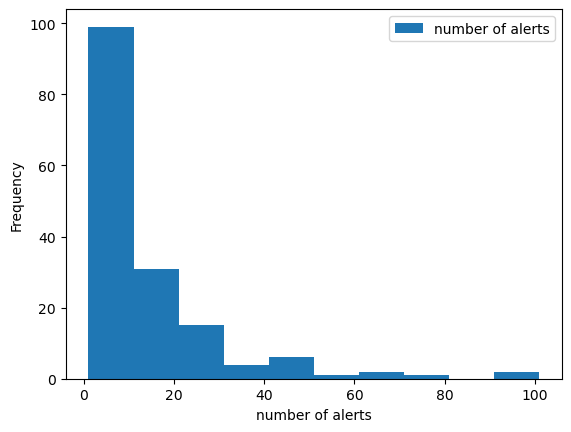

In [38]:
#| label: fig-derek
#| fig-cap: Distribution of Derek alert counts across terminal categories which were clustered

derek_counts = pd.read_csv(interim_dir+'derekalertcount_termcategories.csv', index_col = [0])
derek_counts.plot(kind = 'hist')
plt.xlabel('number of alerts');

Profiling across all the substances in the landscape, the top 3 alerts that triggered the most substances were skin irritation/corrosion related with almost ~2000 substances presenting an alert. The next most populist alerts were for carcinogenicity, hepatoxicity and mutagenicity endpoints, approx 450-550 substances flagged each of these. The mean number of substances presenting an alert was 50 with the median number of substances presenting an alert being 11. The alert profile across the TSCA landscape is quite sparse in terms of the number of alerts flagged. A number of the alerts were highly correlated with each other - at a threshold of 0.8, up to 215 alerts could dropped from further consideration. The number of alerts across the 53 endpoints was summarised across the categories to gain a perspective of which categories were associated with what sorts of endpoints. @fig-alert-tox-hm shows a clustermap of the alert endpoints as a function of the terminal categories. For example, terminal categories containing benzene compounds and their derivatives or organohalogen compounds were associated with heptatoxicity, nephrotoxicity and carcinogenicity related endpoints.

In [19]:
import pandas as pd
import seaborn as sns
new_df= pd.read_csv(interim_dir+'derek_map.csv', index_col = [0])
# Adjust the size according to your preference



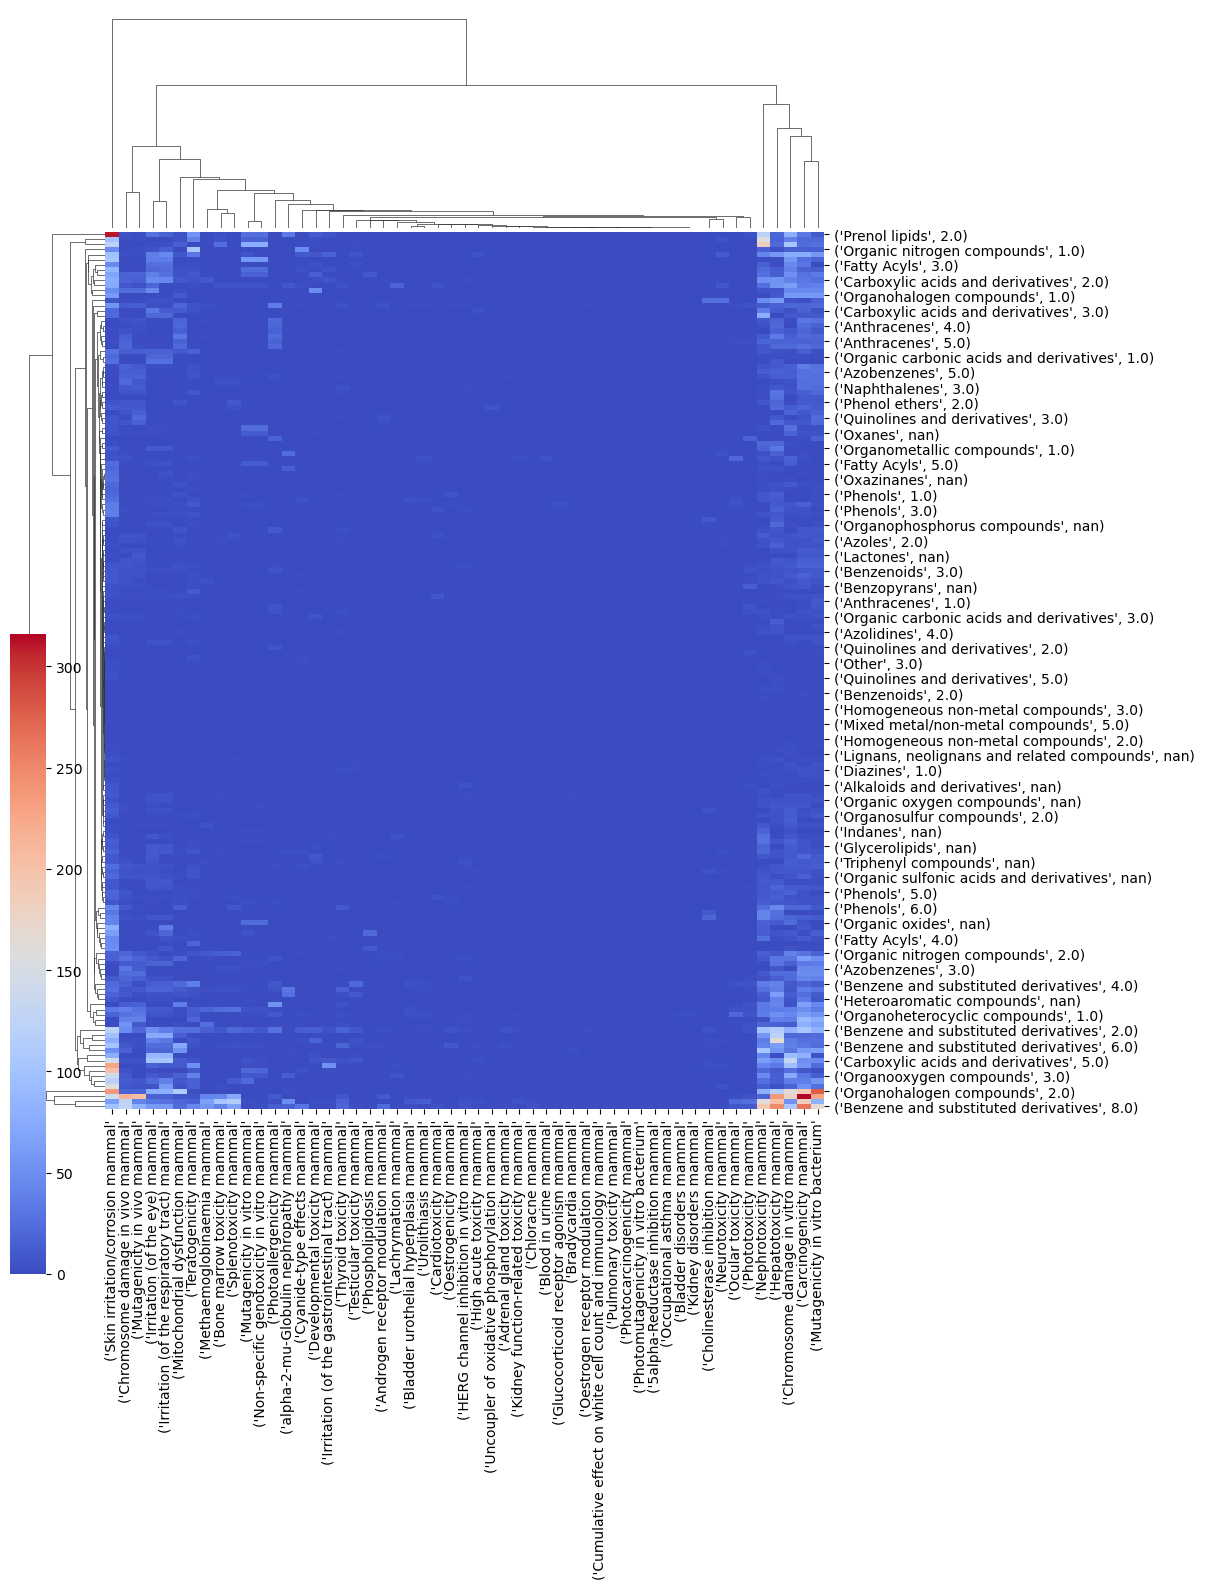

In [27]:
#| label: fig-alert-tox-hm
#| fig-cap: Distribution of Derek alert counts across terminal categories which were clustered
# Create the clustermap
sns.clustermap(new_df, 
               cmap='coolwarm',  # Choose the colormap
               figsize=(12,16),  # Figure size
               row_cluster=True,  # Cluster rows
               col_cluster=True,  # Cluster columns
               dendrogram_ratio=(.1, .2),  # Adjust the ratio of dendrogram height
               #linewidths=0.5,  # Width of lines dividing each cell
              # linecolor='grey',  # Color of lines dividing each cell
               cbar_pos=(0, .2, .03, .4),  # Position of colorbar
               # Label for colorbar
               method='average')  # Method for hierarchical clustering

### Profiling toxicity predictions from TEST 

Predictions were generated for the developmental and Ames mutagenicity endpoints using TEST. Consensus predictions were available for 14194 substances. To explore the coverage of positive/negative predictions across the landscape, t-SNE plots were generated to aid visualisation. @fig-test shows both endpoints. Positive developmental toxicity predictions were found to be quite evenly spread across the landscape whereas positive Ame results appear to cluster in some regions of the chemical space. To probe this a little more, the clustered region of positive predictions were overlaid relative to the terminal categories to start to gauge whether certain categories were visually overrepresented in positive Ames results. To simplify the representation, all terminal categories with fewer than 40 members were aggregated into one 'miscellaneous' category which were hidden in the resulting t-sne plot in @fig-ames.

In [29]:
tsne_all_df = pd.read_csv(interim_dir+'tsne_all_df.csv', index_col = [0])

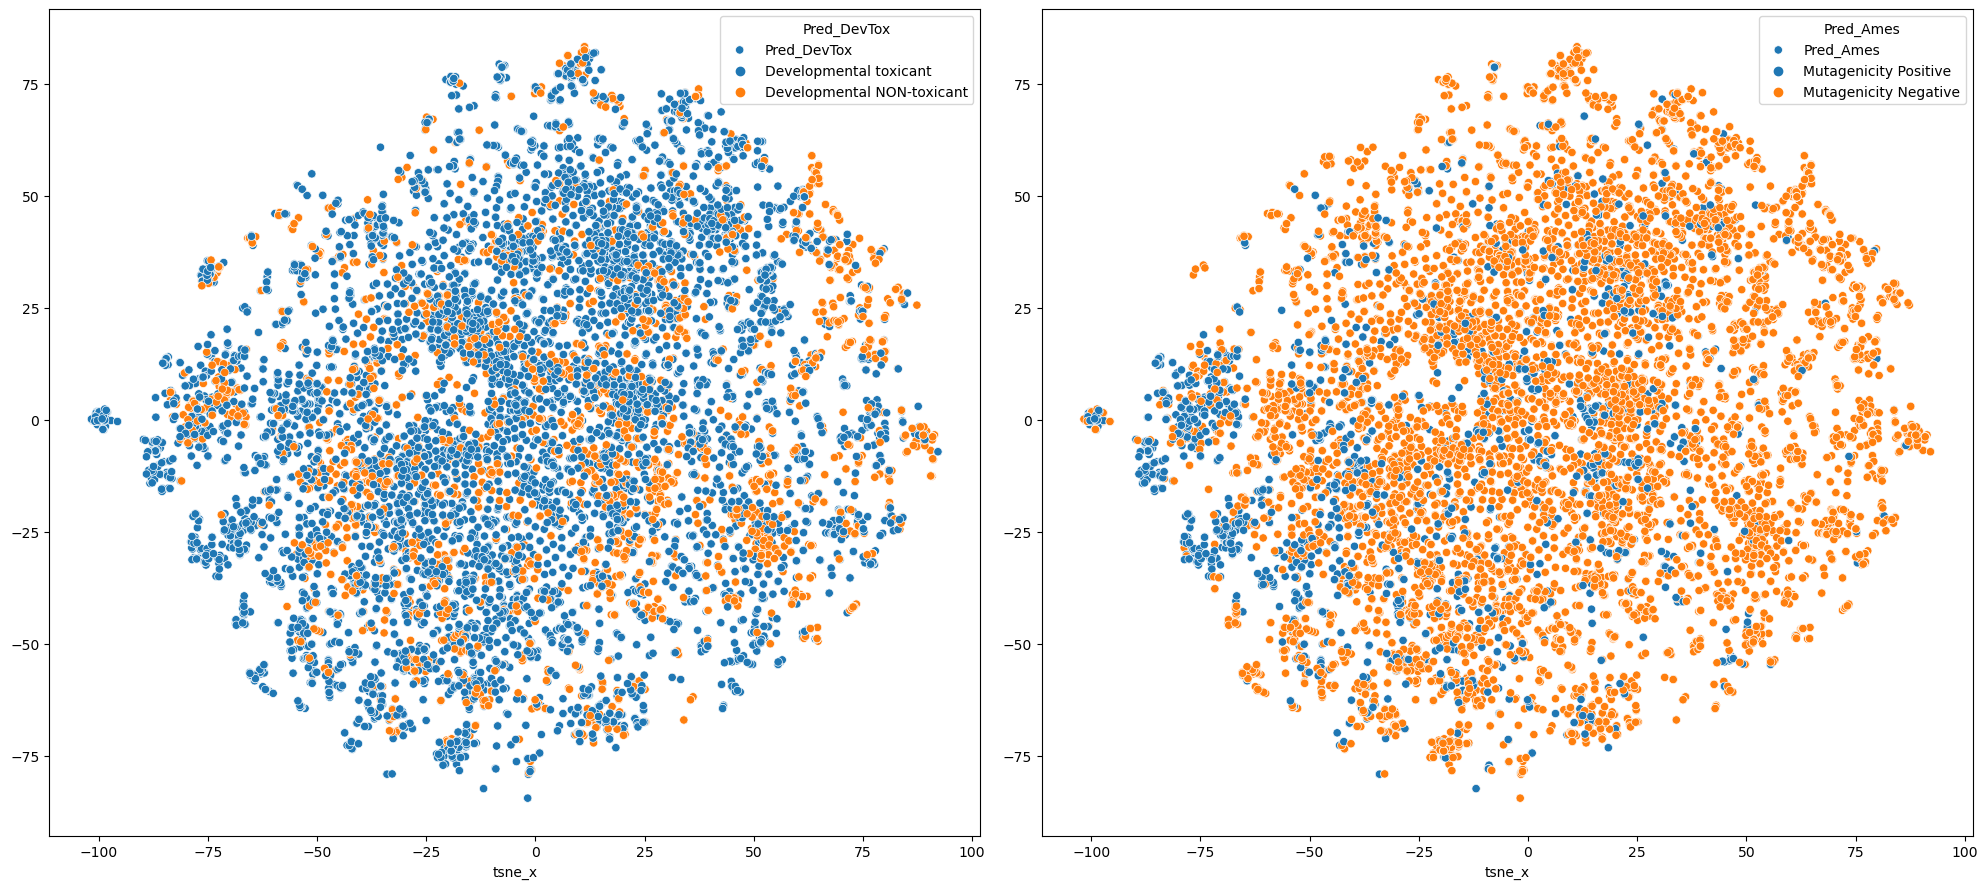

In [30]:
#| label: fig-test
#| fig-cap: t-SNE plots of TEST mutagenicity and developmental toxicity predictions


f = plt.figure(figsize = (20,9))
k=0
for n, e in enumerate( ['Pred_DevTox','Pred_Ames']):
    ax = plt.subplot(1,2, n+1)
    g = sns.scatterplot(x="tsne_x", y="tsne_y", data=tsne_all_df, hue = e, label = e)
    ax.set_ylabel("")
    #plt.subplots_adjust(hspace = 0.8)
handles, labels = ax.get_legend_handles_labels()
#print(labels);
#l = plt.legend(handles[0:5], labels[0:5], bbox_to_anchor=(1.15,0.75), loc=2, borderaxespad=0.)
plt.tight_layout();

Many of the clustered positive predictions appear to be associated with substances in the Benzene and substituted derivatives but exploring the ratio of Ames positives to Ames negatives with the terminal categories showed that Azobenzenes and Anthracenes were substantially overrepresented (@fig-ames). The top 10 terminal categories where a ratio between predicted Ames positive and negative outcomes exceeds 2 are shown in @tbl-amesratio. In contrast ('Steroids and steroid derivatives', nan) and ('Phenylpropanoids and polyketides', 4.0) are examples of terminal categories where developmental toxicity predictions exceed no developmental toxicity (@tbl-devratio). t-SNE plots of 3 of the Ames and Developmental toxicity terminal categories where these ratios of positive:negative outcomes are high are shown in @fig-amesdev.

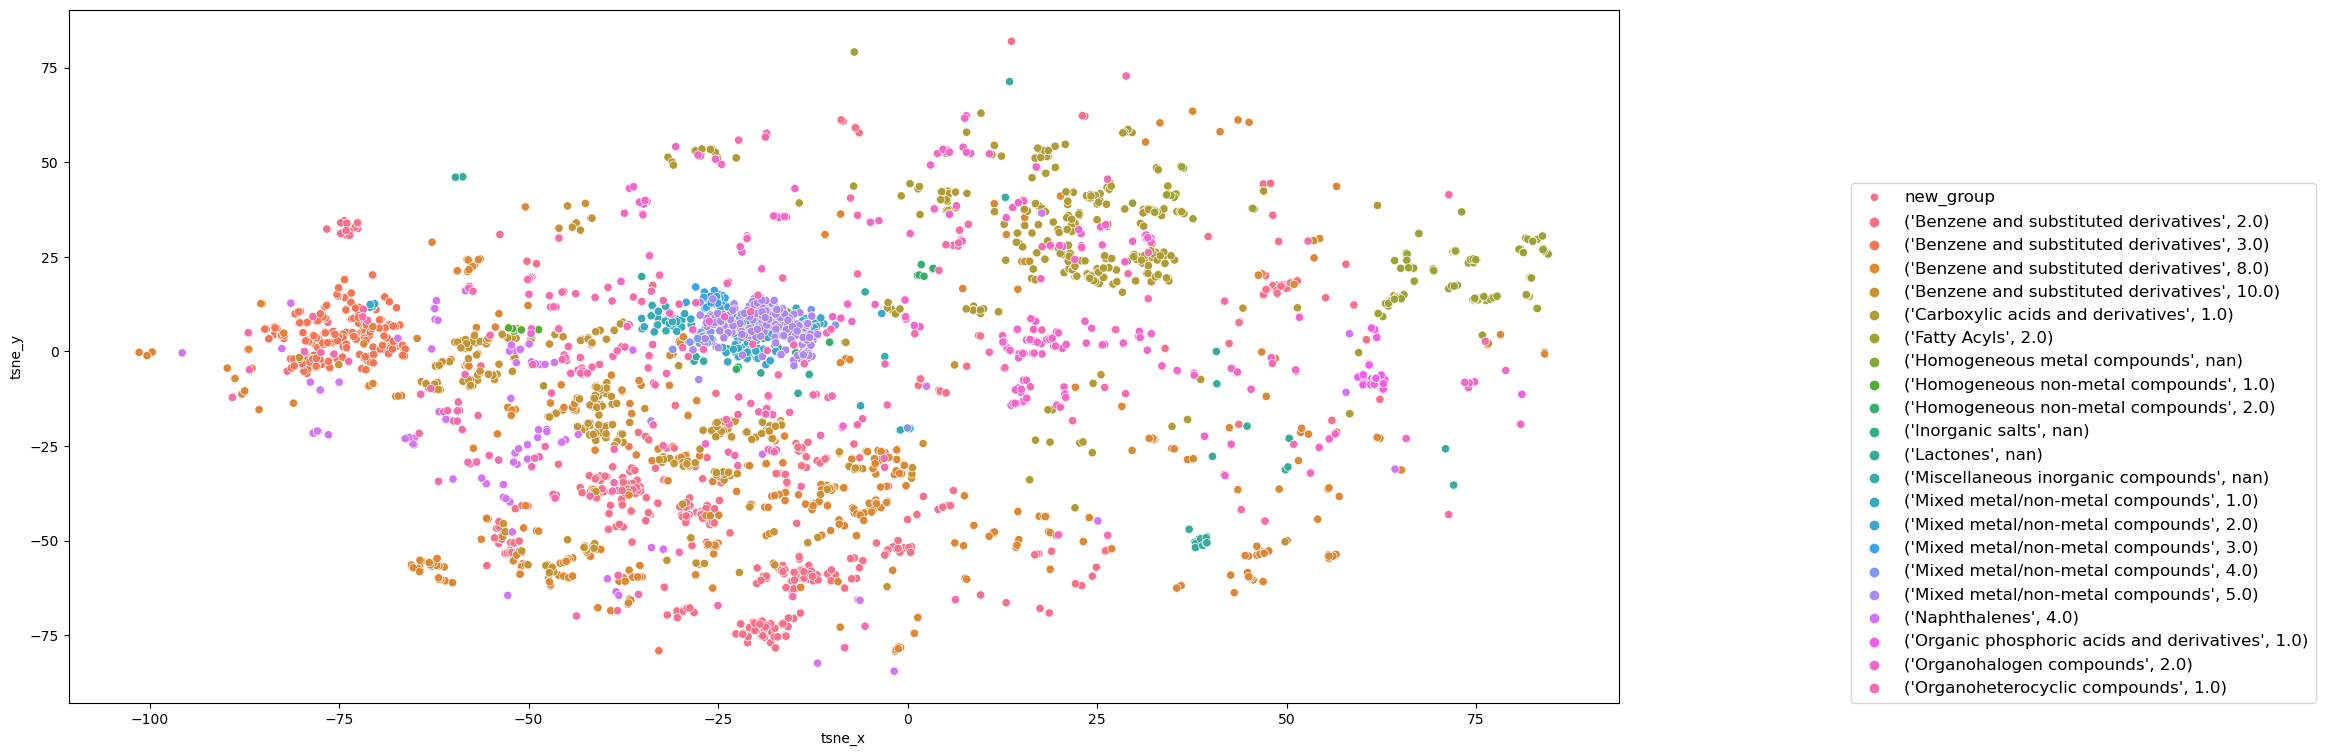

In [34]:
#| label: fig-ames
#| fig-cap: t-SNE plots of TEST mutagenicity predictions for categories with members exceeding 40


ames_aggregated = tsne_all_df.groupby(['group_str'])['Pred_Ames'].value_counts().copy()
misc = ames_aggregated[ames_aggregated <40].reset_index(name = 'count')['group_str'].tolist()
tsne_all_df['new_group'] = tsne_all_df['group_str'].apply(lambda x: 'misc' if x in misc else x)

f = plt.figure(figsize = (20,9))
g = sns.scatterplot(x="tsne_x", y="tsne_y", data=tsne_all_df[tsne_all_df['new_group'] !='misc'], hue = 'new_group', label = 'new_group')

    #plt.subplots_adjust(hspace = 0.8)
handles, labels = ax.get_legend_handles_labels()

plt.legend( bbox_to_anchor=(1.15,0.75), loc=2, borderaxespad=0., fontsize='large');

In [47]:
gss = tsne_all_df.groupby(['group_str', 'Pred_Ames']).size().reset_index().pivot(index='group_str', columns='Pred_Ames', values=0)
gss['ratio'] = gss['Mutagenicity Positive']/gss['Mutagenicity Negative']
#gss.sort_values(by = 'ratio', ascending = False).head(10)

In [49]:
#gss



| Terminal Category | Mutagenicity Negative |	Mutagenicity Positive | Ratio |
|---------|:-----:|:------:|:------:|
| ('Anthracenes', 3.0) 	|1.0 |	21.0 |	21.0|
| ('Anthracenes', 7.0) |	1.0 |	15.0 |	15.0|
| ('Azobenzenes', 7.0) |	1.0 |	13.0 |	13.0|
| ('Anthracenes', 9.0) 	| 5.0 |	46.0 |	9.2|
| ('Quinolines and derivatives', 2.0) |	1.0 |	9.0 	|9.0|
| ('Anthracenes', 6.0) 	| 2.0 |	18.0 |	9.0|
| ('Anthracenes', 4.0) | 	2.0 |	17.0 |	8.5|
| ('Anthracenes', 5.0) |	2.0 |	14.0 |	7.0|
| ('Azobenzenes', 2.0) |	3.0 |	11.0 |	3.67|
| ('Acetylides', nan) |	8.0 	|19.0 |	2.38|

: Top 10 terminal categories where the ratio between positive:negative exceeds 2 {#tbl-amesratio}


| Terminal Category | Developmental NON-toxicant |	Developmental toxicant | Ratio |
|---------|:-----:|:------:|:------:|
| ('Steroids and steroid derivatives', nan) |1.0 |	31.0 |	31.0|
| ('Phenylpropanoids and polyketides', 4.0)|	6.0 |	96.0 |	16.0|
| ('Organic salts', nan) |	1.0 |	16.0 |	16.0|
| ('Phenol ethers', 3.0)	| 1.0 |	15.0 |	15.0|
| ('Azolidines', 5.0) |	1.0 |	15.0 	|15.0|
| ('Azobenzenes', 3.0) 	| 2.0 |	28.0 |	14.0|
| ('Benzenoids', 2.0) | 	1.0 |	12.0 |	12.0|
| ('Triphenyl compounds', nan)|	2.0 |	23.0 |	11.5|
| ('Diazines', 1.0) |	3.0 |	32.0 |	10.67|
| ('Organic phosphoric acids and derivatives', 1.0)|	3.0 	|31.0 |	10.33|

: Top 10 terminal categories where the ratio between positive:negative exceeds 10 {#tbl-devratio}

In [56]:
gss1 = tsne_all_df.groupby(['group_str', 'Pred_DevTox']).size().reset_index().pivot(index='group_str', columns='Pred_DevTox', values=0)
gss1['ratio'] = gss1['Developmental toxicant']/gss1['Developmental NON-toxicant']
gss1.sort_values(by = 'ratio', ascending = False).head(10)

Pred_DevTox                                        Developmental NON-toxicant  \
group_str                                                                       
('Steroids and steroid derivatives', nan)                                 1.0   
('Phenylpropanoids and polyketides', 4.0)                                 6.0   
('Organic salts', nan)                                                    1.0   
('Phenol ethers', 3.0)                                                    1.0   
('Azolidines', 5.0)                                                       1.0   
('Azobenzenes', 3.0)                                                      2.0   
('Benzenoids', 2.0)                                                       1.0   
('Triphenyl compounds', nan)                                              2.0   
('Diazines', 1.0)                                                         3.0   
('Organic phosphoric acids and derivatives', 1.0)                         3.0   

Pred_DevTox                                        Developmental toxicant  \
group_str                                                                   
('Steroids and steroid derivatives', nan)                            31.0   
('Phenylpropanoids and polyketides', 4.0)                            96.0   
('Organic salts', nan)                                               16.0   
('Phenol ethers', 3.0)                                               15.0   
('Azolidines', 5.0)                                                  15.0   
('Azobenzenes', 3.0)                                                 28.0   
('Benzenoids', 2.0)                                                  12.0   
('Triphenyl compounds', nan)                                         23.0   
('Diazines', 1.0)                                                    32.0   
('Organic phosphoric acids and derivatives', 1.0)                    31.0   

Pred_DevTox                                            ratio  
group_str                                                     
('Steroids and steroid derivatives', nan)          31.000000  
('Phenylpropanoids and polyketides', 4.0)          16.000000  
('Organic salts', nan)                             16.000000  
('Phenol ethers', 3.0)                             15.000000  
('Azolidines', 5.0)                                15.000000  
('Azobenzenes', 3.0)                               14.000000  
('Benzenoids', 2.0)                                12.000000  
('Triphenyl compounds', nan)                       11.500000  
('Diazines', 1.0)                                  10.666667  
('Organic phosphoric acids and derivatives', 1.0)  10.333333

In [43]:
import pickle
tsne_lst = pickle.load(open(interim_dir+ "tsne_lst_100823.pkl", "rb" ) )

In [71]:
for i in range(len(tsne_lst)):
       if tsne_lst[i]['label'] in [ "('Steroids and steroid derivatives', nan)" , "('Phenylpropanoids and polyketides', 4.0)"  , "('Organic salts', nan)"]:
            print(i)
        
            

120
164
177


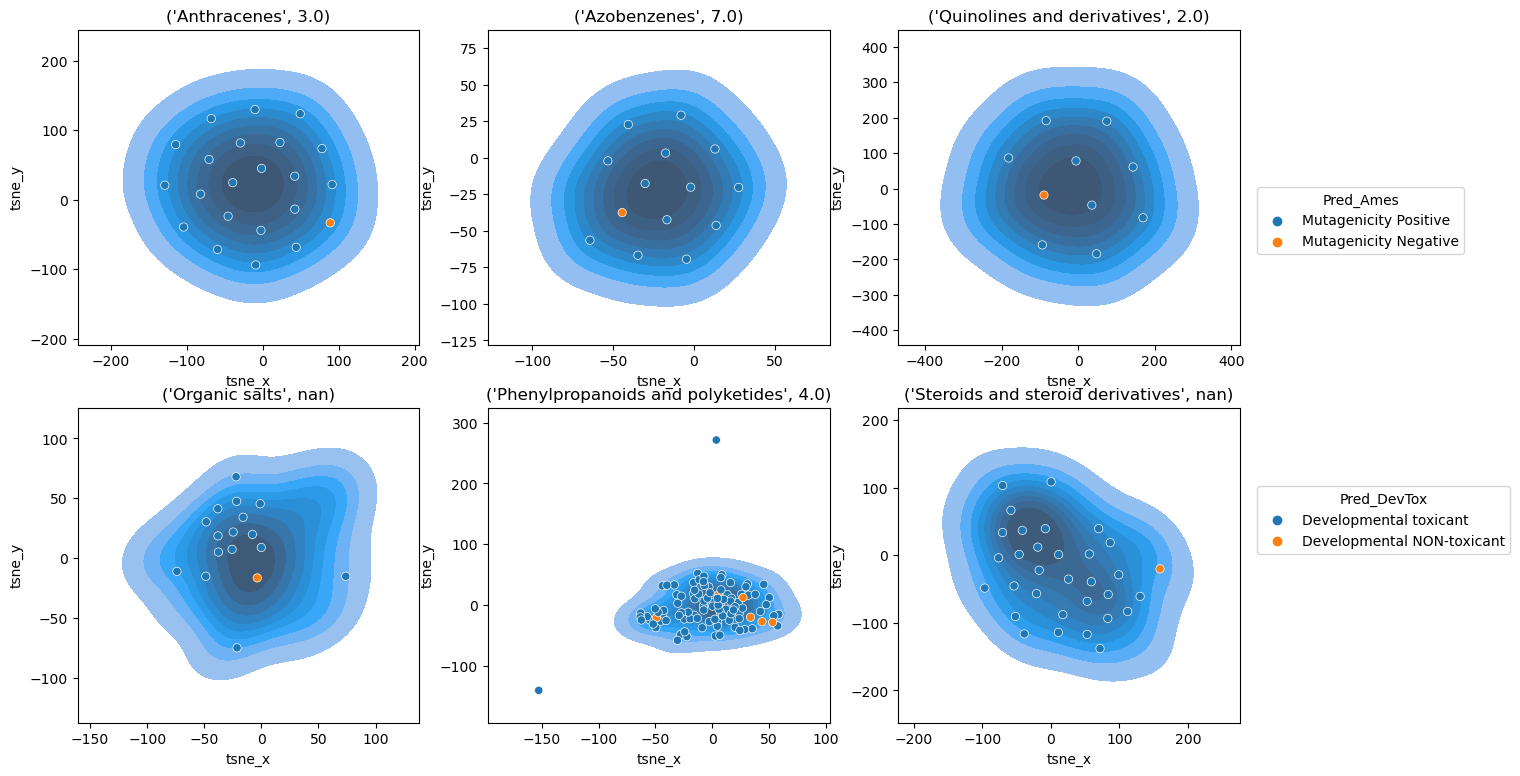

In [92]:
#| label: fig-ames2
#| fig-cap: 't-SNE plots of selected categories that are overrepresented by Ames positive predictions '



fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3,figsize = (15,9))
plt.subplots_adjust(hspace = 0.2)
#colors = {1:'red', 0 : 'blue'}
ax1.title.set_text(tsne_lst[5]['label'])
ax2.title.set_text(tsne_lst[18]['label'])
ax3.title.set_text(tsne_lst[173]['label'])

ax4.title.set_text(tsne_lst[120]['label'])
ax5.title.set_text(tsne_lst[164]['label'])
ax6.title.set_text(tsne_lst[177]['label'])

#grouped = tsne_df.groupby('Source')
#for key, group in grouped:
#    group.plot(ax=ax, kind='scatter', x='tsne_x', y='tsne_y', alpha = alphas[0], label=key, color=colors[key])
ax1 = sns.kdeplot(x="tsne_x", y="tsne_y", fill = True,
                     data=tsne_lst[5]['tsne'], ax = ax1)
ax1 = sns.scatterplot(x="tsne_x", y="tsne_y", hue = 'Pred_Ames',
                     data=tsne_lst[5]['tsne'], ax = ax1)

ax2 = sns.kdeplot(x="tsne_x", y="tsne_y", fill = True,
                     data=tsne_lst[18]['tsne'], ax = ax2)
ax2 = sns.scatterplot(x="tsne_x", y="tsne_y", hue = 'Pred_Ames',
                     data=tsne_lst[18]['tsne'], ax = ax2)

ax3 = sns.kdeplot(x="tsne_x", y="tsne_y", fill = True,
                     data=tsne_lst[173]['tsne'], ax = ax3)
ax3 = sns.scatterplot(x="tsne_x", y="tsne_y", hue = 'Pred_Ames',
                     data=tsne_lst[173]['tsne'], ax = ax3)


ax4 = sns.kdeplot(x="tsne_x", y="tsne_y", fill = True,
                     data=tsne_lst[120]['tsne'], ax = ax4)
ax4 = sns.scatterplot(x="tsne_x", y="tsne_y", hue = 'Pred_DevTox',
                     data=tsne_lst[120]['tsne'], ax = ax4)

ax5 = sns.kdeplot(x="tsne_x", y="tsne_y", fill = True,
                     data=tsne_lst[164]['tsne'], ax = ax5)
ax5 = sns.scatterplot(x="tsne_x", y="tsne_y", hue = 'Pred_DevTox',
                     data=tsne_lst[164]['tsne'], ax = ax5)

ax6= sns.kdeplot(x="tsne_x", y="tsne_y", fill = True,
                     data=tsne_lst[177]['tsne'], ax = ax6)
ax6 = sns.scatterplot(x="tsne_x", y="tsne_y", hue = 'Pred_DevTox',
                     data=tsne_lst[177]['tsne'], ax = ax6)


ax1.get_legend().remove()
ax2.get_legend().remove()
ax4.get_legend().remove()
ax5.get_legend().remove()
handles, labels = ax3.get_legend_handles_labels()
handles1, labels1 = ax6.get_legend_handles_labels()
#labels = ['Testing Track C', 'Testing Track A', 'Testing Track B', 'Testing Track D']
legend_title = 'Pred_Ames'
ax3.legend(handles,labels, title=legend_title, bbox_to_anchor=(1.05,0.5), loc=2, borderaxespad=0.)
legend_title = 'Pred_DevTox'
ax6.legend(handles1,labels1, title =legend_title,bbox_to_anchor=(1.05,0.75), loc=2, borderaxespad=0.)




In [35]:
g = pd.concat([tsne_all_df.groupby(['Pred_DevTox']).count()[['group_str', 'final_picks']], tsne_all_df.groupby(['Pred_Ames']).count()[['group_str', 'final_picks']]]).reset_index().melt(id_vars=['index'], value_vars=['group_str', 'final_picks'])
#reset_index().pivot(index='group_str', columns='Pred_Ames', values=0)
g.columns = ['Prediction', 'Landscape', 'Count']

In [40]:
#tsne_all_df.Pred_DevTox.value_counts(dropna = False)

In terms of the profile of the selected candidate substances relative to the full landscape, the number of substances predicted positive and negative is shown in @fig-count. The profile trend between the full landscape and the selected candidate substances are consistent but the number of substances predicted to be developmental toxicants is surprisingly high. This is at least consistent with the test set performance metrics reported in the user manual [https://www.epa.gov/sites/default/files/2016-05/documents/600r16058.pdf] namely that the sensitivity of the developmental toxicity consensus model was 0.9 in contrast to the specificity 0f 0.471. The test set performance metrics were similar for sensitivity and specificity, 0.79 and 0.756 respectively.

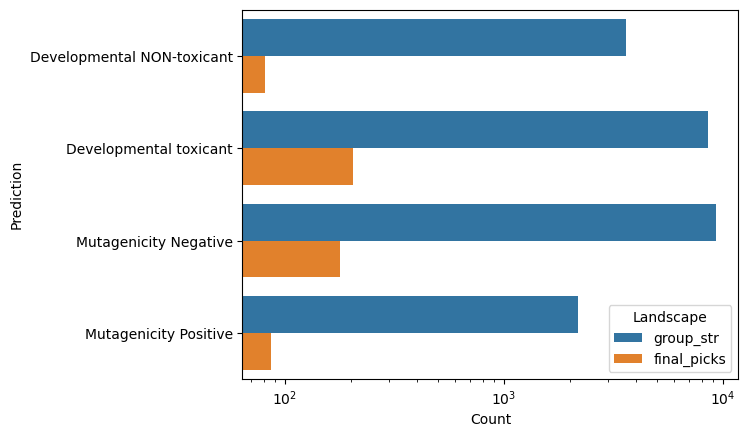

In [31]:
#| label: fig-count
#| fig-cap: 't-SNE plots of selected categories that are overrepresented by Ames positive predictions '


sns.barplot(y = 'Prediction', x = 'Count', hue = 'Landscape', data = g) 
plt.xscale('log')

### Profiling toxicity predictions from OPERA 

Predictions were generated using OPERA v2.8 for all TSCA landscape substances. @fig-catmos presents the distribution of CATMOS predictions to show the range of LD50 acute oral values for the landscape as a whole and how this is represented for the candidate selections. The medians of the TSCA landscape and candidate selections were very similar, with values ~2300 mg/kg and ~2100 mg/kg which are borderline low toxicity. The median LD50 values differed across the terminal categories with ('Organosulfur compounds', 2.0), ('Allenes', nan) and ('Allenes', nan) having a median LD ~245 mg/kg whereas ('Benzenoids', 5.0) and ('Fatty Acyls', 3.0) had a median ~7000 mg/kg. @fig-catmos-ecdf showcase the ECDFs for these selected terminal categories to highlight the difference in potencies. Those terminal categories with lower LD50 values have ECDFs  that are more right shifted. 

In [94]:
opera_df = pd.read_csv(interim_dir+'opera_df_tox.csv', index_col = [0])

In [95]:
opera_df['CATMoS_LD50_pred'].describe()

count    13296.000000
mean      2844.124595
std       2533.394636
min          1.100000
25%        936.000000
50%       2322.000000
75%       3265.250000
max      17931.000000
Name: CATMoS_LD50_pred, dtype: float64

In [96]:
opera_df[opera_df['final_picks'] ==1]['CATMoS_LD50_pred'].describe()

count      318.000000
mean      2537.672956
std       2605.383299
min         39.000000
25%        741.750000
50%       2162.500000
75%       2797.000000
max      17538.000000
Name: CATMoS_LD50_pred, dtype: float64

In [121]:
opera_df['final_picks'] = opera_df['final_picks'].replace(np.nan, 0)

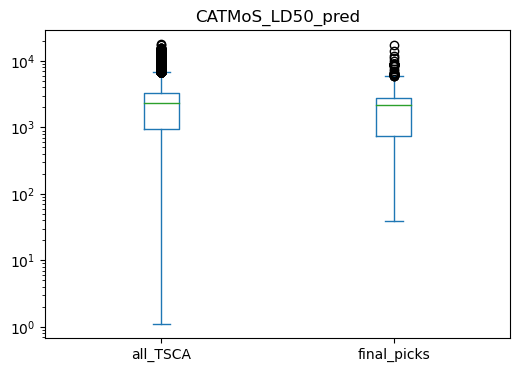

In [133]:

#| label: fig-catmos
#| fig-cap: 'Distribution of acute oral toxicity predictions for the TSCA Landscape relative to the candidate substances'
ax = opera_df.plot.box(column="CATMoS_LD50_pred", by="final_picks",  figsize=(6, 4))
plt.xticks([1,2], ['all_TSCA','final_picks'])
plt.yscale('log')
# Set the labels for x-axis ticks
#labels[1] = 'all_TSCA'
#labels[2] = 'final_picks'
#ax.set_xticklabels(labels)

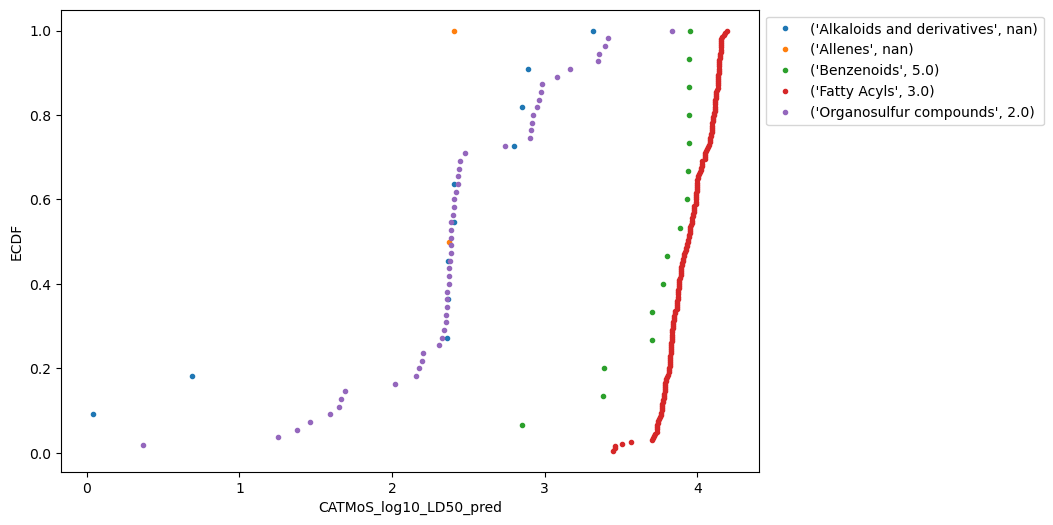

In [155]:
#| label: fig-catmos-ecdf
#| fig-cap: 'ECDFs of acute oral toxicity predictions for selected terminal categories'
fig, ax = plt.subplots(figsize = (9,6))
for i in range(len(summaries)):
    if summaries[i]['label'] in ["('Benzenoids', 5.0)", "('Fatty Acyls', 3.0)","('Alkaloids and derivatives', nan)", "('Organosulfur compounds', 2.0)", "('Allenes', nan)"]:
        ax.set_xlabel('CATMoS_log10_LD50_pred')
        ax.set_ylabel('ECDF')
        #ax.set_title('ECDFs of selected between Category-Subcategory combinations')
        ax.plot(np.log10(summaries[i]['ecdfx']),summaries[i]['ecdfy'], marker = '.', linestyle = 'none', label = summaries[i]['label']);
        ax.legend(bbox_to_anchor=(1, 1))
        

# REFERENCES